In [704]:
!pip install plotly
!pip install -U kaleido
!pip install statsmodels


[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip




[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
     ---------------------------------------- 9.4/9.4 MB 6.2 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 7.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [818]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import seaborn as sns
import re
from utils import resize
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from bs4 import BeautifulSoup as bs
pd.set_option('display.max_colwidth', 1000)

In [384]:
sep = '|'
df_orig = pd.read_csv("..\\raw_csv\\2022_Annual_Survey_Aggregate_Data_for_2022_Annual_Survey_20220905222712-SurveyExport.csv", sep = sep)
is_military = df_orig['Are you, or were you ever, an active member of the military or member of the National Guard or Reserve?'] == 'Yes'
df_orig_military = df_orig[is_military].copy().reset_index()
df_orig_civ = df_orig[~is_military].copy().reset_index()
df_orig_military['All'] = 'All'
df_orig['is_military'] = is_military

In [4]:
school_labels = ['educa', 'school', 'college', 'student', 'study', 'degree']
job_labels = ['job', 'work', 'career', 'employ', 'salary', 'trade']
finance_labels = ['credit', 'financ', 'pay', 'salary', 'income', 'money', 'budget','savings',
                 'disability', 'claim']
hosing_labels = ['home', 'hous']
health_labels = ['condition', 'disease', 'insurance','sleep', 'covid', 'exercise', 
                 'sports','health', 'medical', 'weight', 'therapy', 'gym', 'smoke',
                 'drink', 'claim']
service_labels = ['service', 'tour', 'war', 'discharge', 'military', 'deploy']
persion_labels = ['relig', 'therapy', 'spirit', 'practice', 'smoke',
                  'drink', 'transport', 'race', 'gender', 'read']
community_labels = ['community']
hope_scale_labels = ['adult hope scale', 'hope scale score']
topics = ['Education', 'Employment', 'Financial', 'Home', 'Health', 
                              'Service', 'Community', 'Personal', 'Hope Scale']
topic_labels = [school_labels, job_labels, finance_labels, hosing_labels, health_labels,
                             service_labels, community_labels, persion_labels, hope_scale_labels]
labels_dict = {}
questions_used = set()
for labelName, labels in zip(topics, topic_labels):
    
    labels_dict[labelName] = {col for col in df_orig if any(x in col.lower() for x in labels)}
    questions_used = questions_used.union(labels_dict[labelName])
labels_dict['Other'] = {x for x in df_orig  if not x in questions_used}

In [68]:
ordered_list = {}
for x in labels_dict:
    ordered_list[x] = []
    for col in df_orig:
        if col in labels_dict[x]:
            ordered_list[x].append(col)

In [106]:
cnt = 1
for col in df_orig:
    print('   ' + str(cnt) + '.', re.sub('[^a-z^0-9^?^.^:^;^,^(^)^/^-^"^\'^ ]', ' ', col, flags = re.IGNORECASE).strip())
    print()
    cnt+=1

   1. Response ID

   2. Time Started

   3. Date Submitted

   4. Status

   5. Legacy Comments

   6. Comments

   7. Language

   8. Referer

   9. SessionID

   10. User Agent

   11. Tags

   12. What is your zip code?

   13. Are you, or were you ever, an active member of the military or member of the National Guard or Reserve?

   14. Have you ever received information or assistance from  veteran serving organizations within your community?

   15. What is your gender?

   16. Gender (Optional):

   17. Post 9/11 era (September 11, 2001   Present):Service era (Select all that apply)

   18. Persian Gulf era (August 1991   September 2001):Service era (Select all that apply)

   19. Post Vietnam era (May 1975   July 1991):Service era (Select all that apply)

   20. Vietnam era (August 1964   April 1975):Service era (Select all that apply)

   21. Between Korea and Vietnam era (February 1955   July 1964):Service era (Select all that apply)

   22. Korean War era (June 1950   Januar

In [105]:
df_orig['Race:Â\xa0'].fillna('Prefer not to answer').value_counts()

Prefer not to answer                         1268
White American                               1072
Black or African American                     149
American Indian or Alaska Native              140
Hispanic or Latino                             97
Native Hawaiian or Other Pacific Islander      95
Asian American                                 69
Other/ Multi-racial                            17
Name: Race:Â , dtype: int64

In [100]:
df_orig[['Race:Â\xa0', 'is_military']].value_counts().reset_index().rename(columns = 
                                                                        {'Race:Â\xa0' : 'Race', 0 : 'count'})['count'].sum()

1690

In [101]:
df_orig[['What is your gender?', 'is_military']].value_counts().reset_index().rename(
    columns = {'What is your gender?' : 'Gender', 0 : 'count'})['count'].sum()

2176

In [80]:
color_map = {'Male': '#636EFA',
 'Other': '#FF6692',
 'Female': '#EF553B'}
gender_info = df_orig[['What is your gender?', 'is_military']].value_counts().reset_index().rename(
    columns = {'What is your gender?' : 'Gender', 0 : 'count'})
gender_info = gender_info.sort_values('count')
fig = px.pie(gender_info[gender_info['is_military']], values='count', names='Gender', 
             color = 'Gender',
             title='Military Respondents', 
             color_discrete_map = color_map)
#fig.write_image("plots_2022/Demographics/Gender_military.png")
fig. update_layout(showlegend=False)
fig.write_html("plots_2022/HTML/Military_Gender_Demographics.html",  include_plotlyjs="cdn", full_html=False)
fig = px.pie(gender_info[~gender_info['is_military']], 
             values='count', 
             names='Gender', 
             color = 'Gender',
             title='Non-Military Respondents', 
             color_discrete_map = color_map)
# fig.write_image("plots_2022/Demographics/Gender_non_military.png")
fig. update_layout(showlegend=False)
fig.write_html("plots_2022/HTML/NonMilitary_Gender_Demographics.html",  include_plotlyjs="cdn", full_html=False)

fig = px.pie(gender_info.drop_duplicates("Gender"), 
             values='count', 
             names='Gender', 
             color = 'Gender',
             color_discrete_map = color_map)
fig.write_html("plots_2022/HTML/Legend_Gender_Demographics.html",  include_plotlyjs="cdn", full_html=False)

In [94]:
color_map = {'White American': '#636EFA',
 'American Indian or Alaska Native': '#B6E880',
 'Black or African American': '#00CC96',
 'Hispanic or Latino': '#AB63FA',
 'Native Hawaiian or Other Pacific Islander': '#FFA15A',
 'Asian American': '#19D3F3',
 'Prefer not to answer': '#FF6692',
 'Other/ Multi-racial': '#EF553B'}
df_orig['Race:Â\xa0'].fillna('Prefer not to answer')
race_info = df_orig[['Race:Â\xa0', 'is_military']].value_counts().reset_index().rename(columns = 
                                                                        {'Race:Â\xa0' : 'Race', 0 : 'count'})
race_info = race_info.sort_values('count')
fig = px.pie(race_info[race_info['is_military']], values='count', names='Race', 
             color = 'Race',
             title='Military Respondents', 
             color_discrete_map = color_map)
# fig.write_image("plots_2022/Demographics/Race_military.png")
fig. update_layout(showlegend=False)
fig.write_html("plots_2022/HTML/Military_Race_Demographics.html",  include_plotlyjs="cdn", full_html=False)
fig = px.pie(race_info[~race_info['is_military']], 
             values='count', 
             names='Race', 
             color = 'Race',
             title='Non-Military Respondents',
             color_discrete_map = color_map)
# fig.write_image("plots_2022/Demographics/Race_non_military.png")
fig. update_layout(showlegend=False)
fig.write_html("plots_2022/HTML/NonMilitary_Race_Demographics.html",  include_plotlyjs="cdn", full_html=False)

race_info = race_info.sort_values('count')
fig = px.pie(race_info.drop_duplicates('Race'), values='count', names='Race', 
             color = 'Race',
             color_discrete_map = color_map
            )
# fig.write_image("plots_2022/Demographics/Race_military.png")
fig.update_traces(textposition='inside', hovertext='')
fig.write_html("plots_2022/HTML/Legend_Race_Demographics.html",  include_plotlyjs="cdn", full_html=False)

In [64]:
fig.layout.legend.itemsizing

In [33]:
color_map = {'White American': '#636EFA',
 'American Indian or Alaska Native': '#B6E880',
 'Black or African American': '#00CC96',
 'Hispanic or Latino': '#AB63FA',
 'Native Hawaiian or Other Pacific Islander': '#FFA15A',
 'Asian American': '#19D3F3',
 'Prefer not to answer': '#FF6692',
 'Other/ Multi-racial': '#EF553B'}

race_info = df_orig[['Race:Â\xa0', 'is_military']].value_counts().reset_index().rename(columns = 
                                                                        {'Race:Â\xa0' : 'Race', 0 : 'count'})
race_info = race_info.sort_values('count')
military_race_info = race_info[race_info['is_military']]
pie1 = go.Pie(values=military_race_info['count'].values, labels=military_race_info['Race'].values,
             title='Military Respondents')
military_race_info = race_info[~race_info['is_military']]
pie2 = go.Pie(values=military_race_info['count'].values, labels=military_race_info['Race'].values,
             title='Non-Military Respondents')
fig = go.Figure(data=[pie1, pie2])
fig

In [13]:
fig.add_trace?

In [107]:
for x in ordered_list:
    print(x)
    cnt = 1
    for y in ordered_list[x]:
        print('   ' + str(cnt) + '.', re.sub('[^a-z^0-9^?^.^:^;^,^(^)^/^-^"^\'^ ]', ' ', y, flags = re.IGNORECASE))
        print()
        cnt+=1
    print()
    print()

Education
   1. Education benefits (e.g., Montgomery, Post 9/11, GI Bill)   for my family  or myself:What information or resources are you seeking (Select all that apply)?

   2. Enrollment in school (e.g., an education program/vocational program):What information or resources are you seeking (Select all that apply)?

   3. Support to stay in school (e.g., remain on track to graduate):What information or resources are you seeking (Select all that apply)?

   4. How would you rate your level of satisfaction with the education benefits and programs?: Rate the resources you may have received from VA or a community based program:

   5. Education status: What is the highest degree or level of school you have completed?

   6. Are you currently pursuing any of the following degrees or certifications?

   7. Have helped me enroll in school:To what extent do you disagree or agree with the following statements regarding  veteran serving organizations within your community?

   8. Educational s

In [108]:
for x in ordered_list:
    print(x)

Education
Employment
Financial
Home
Health
Service
Community
Personal
Hope Scale
Other


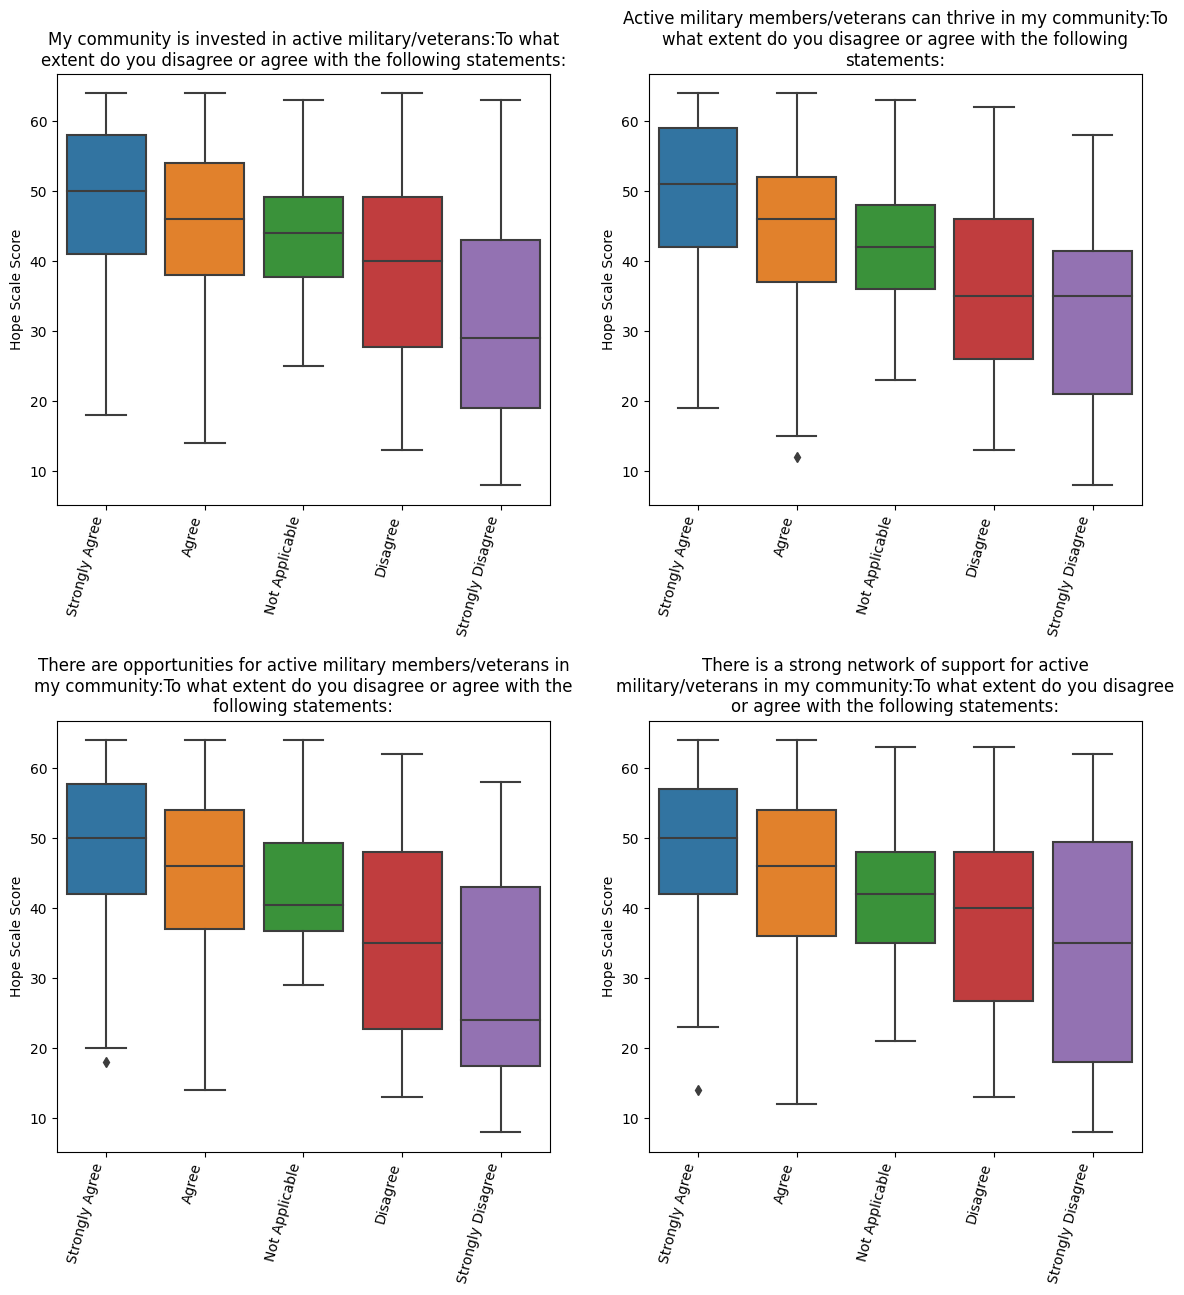

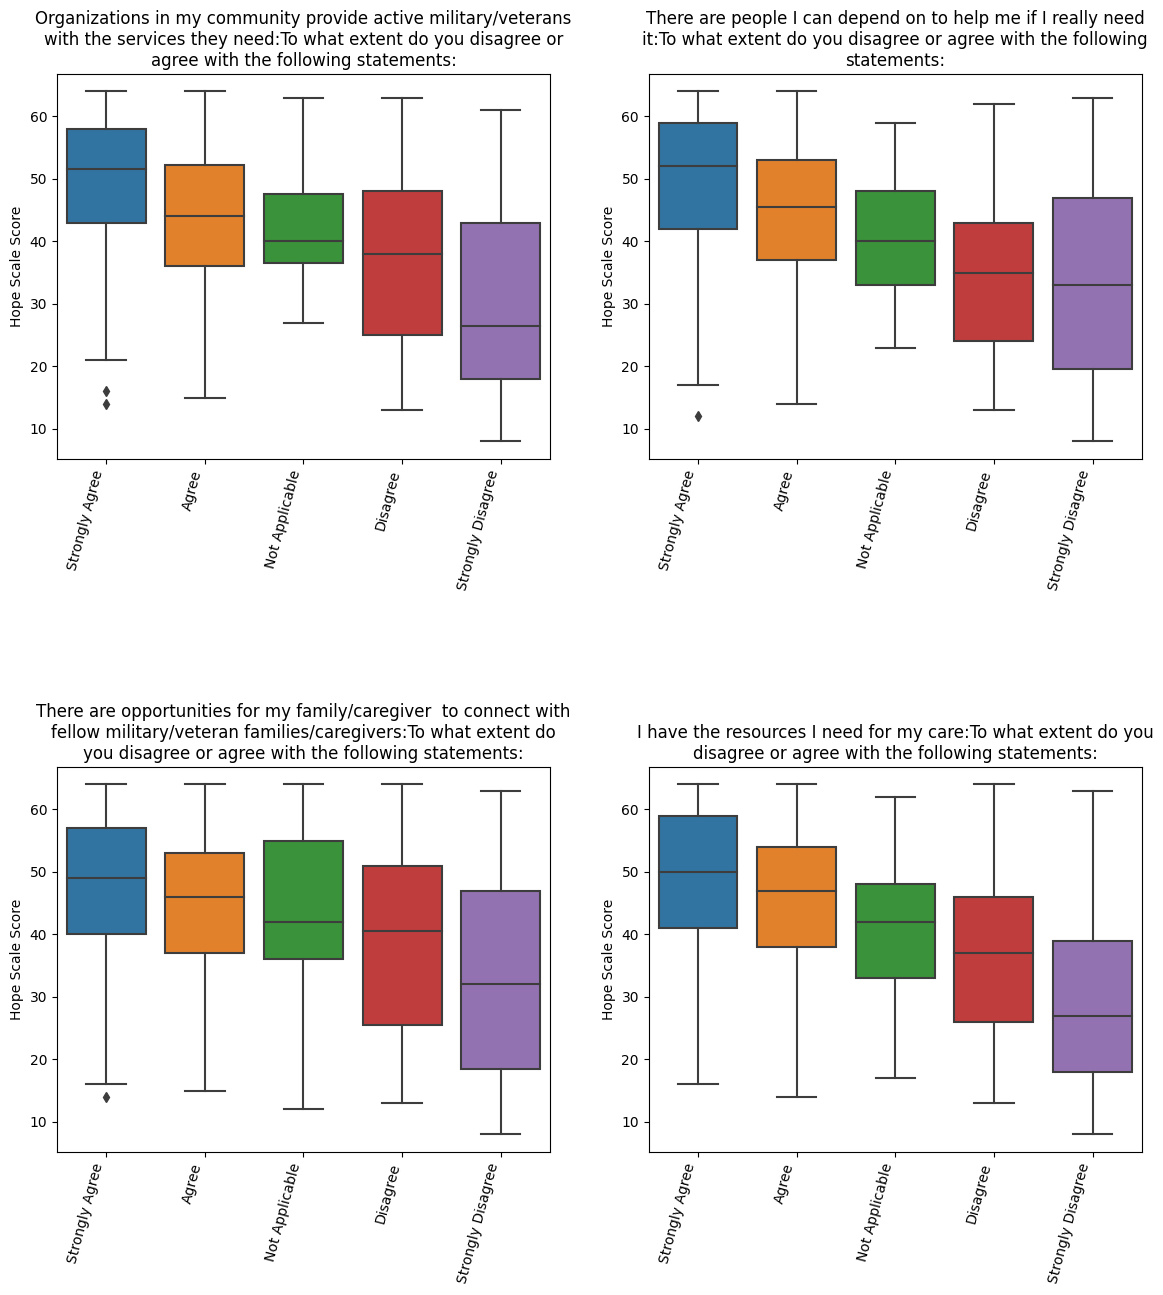

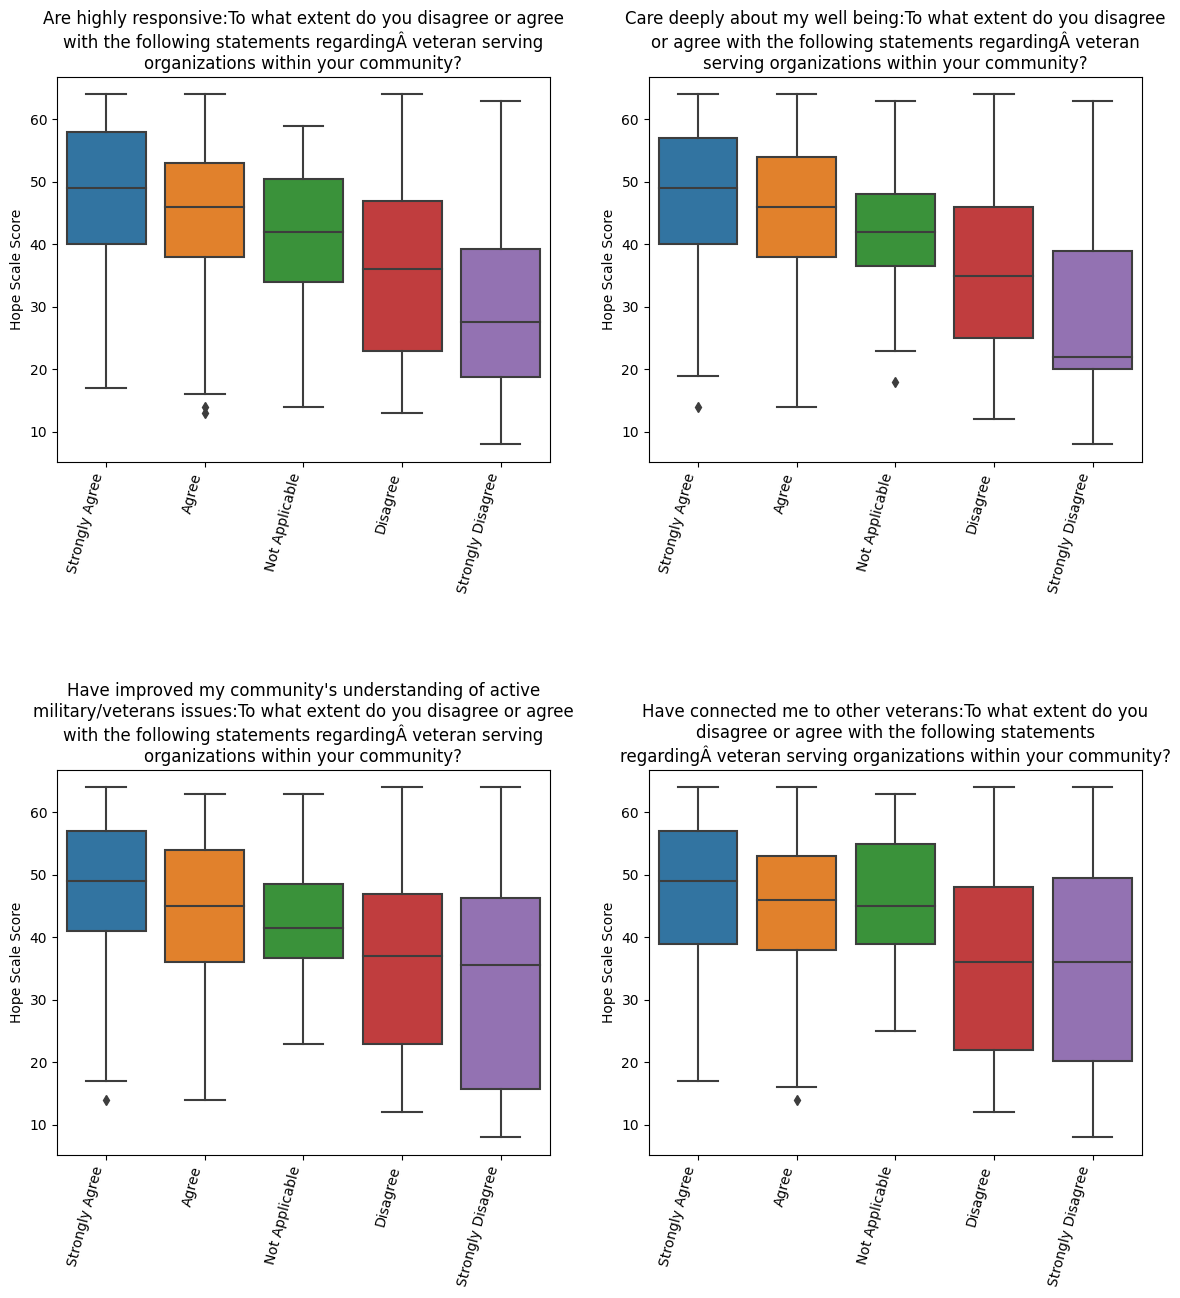

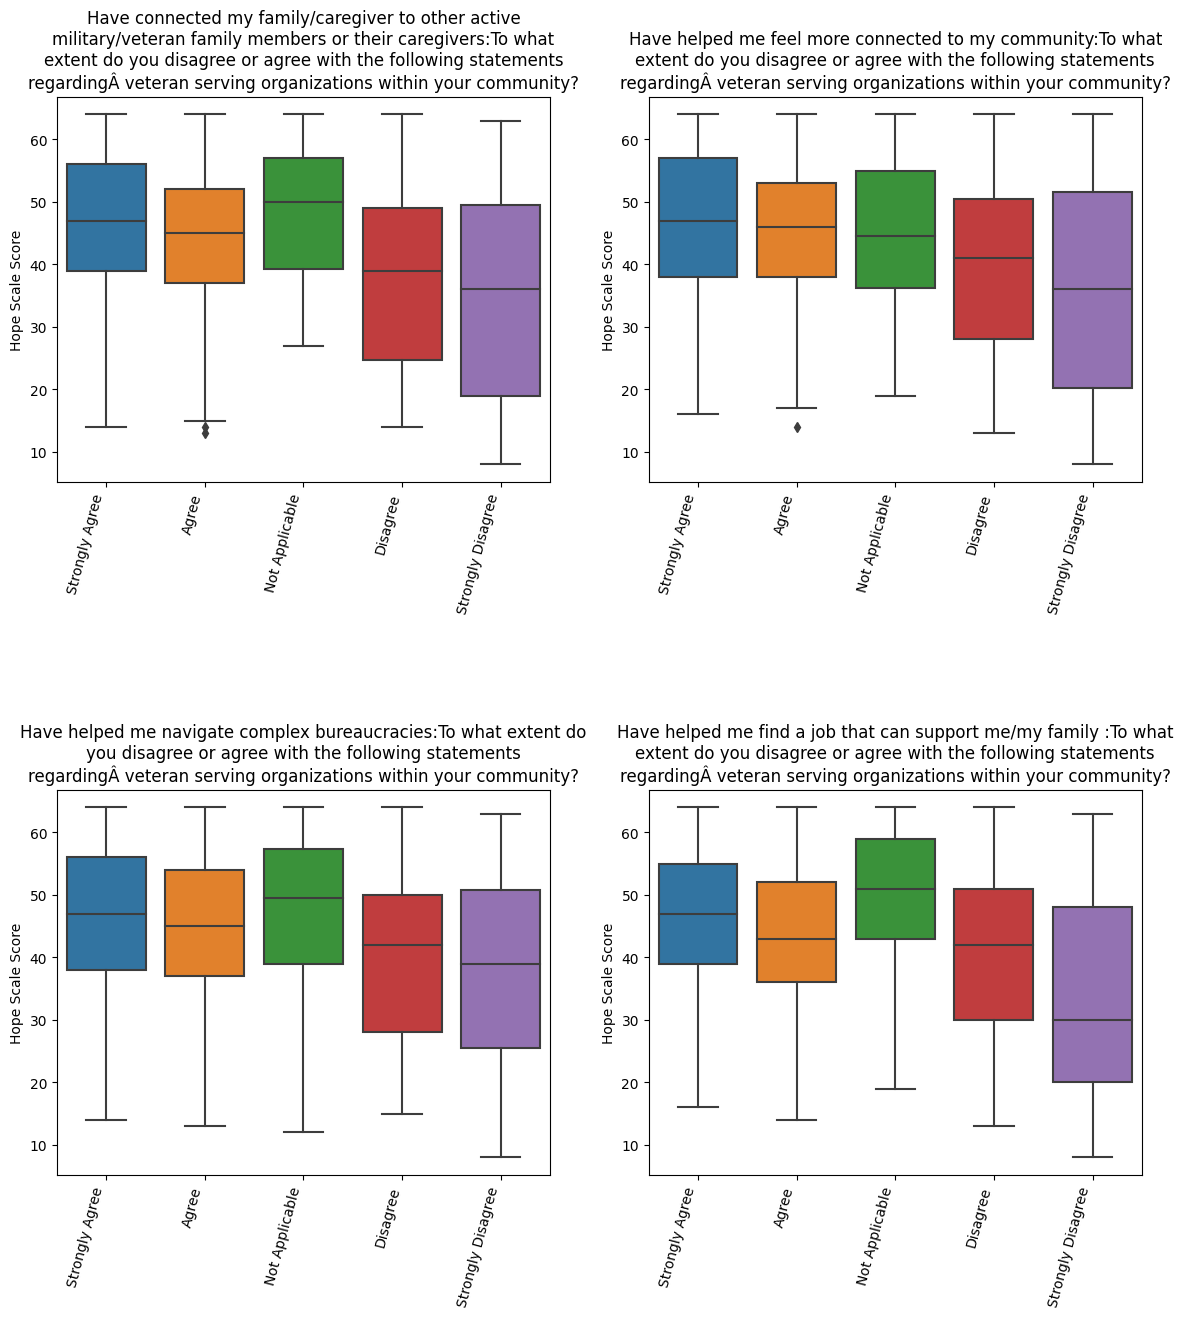

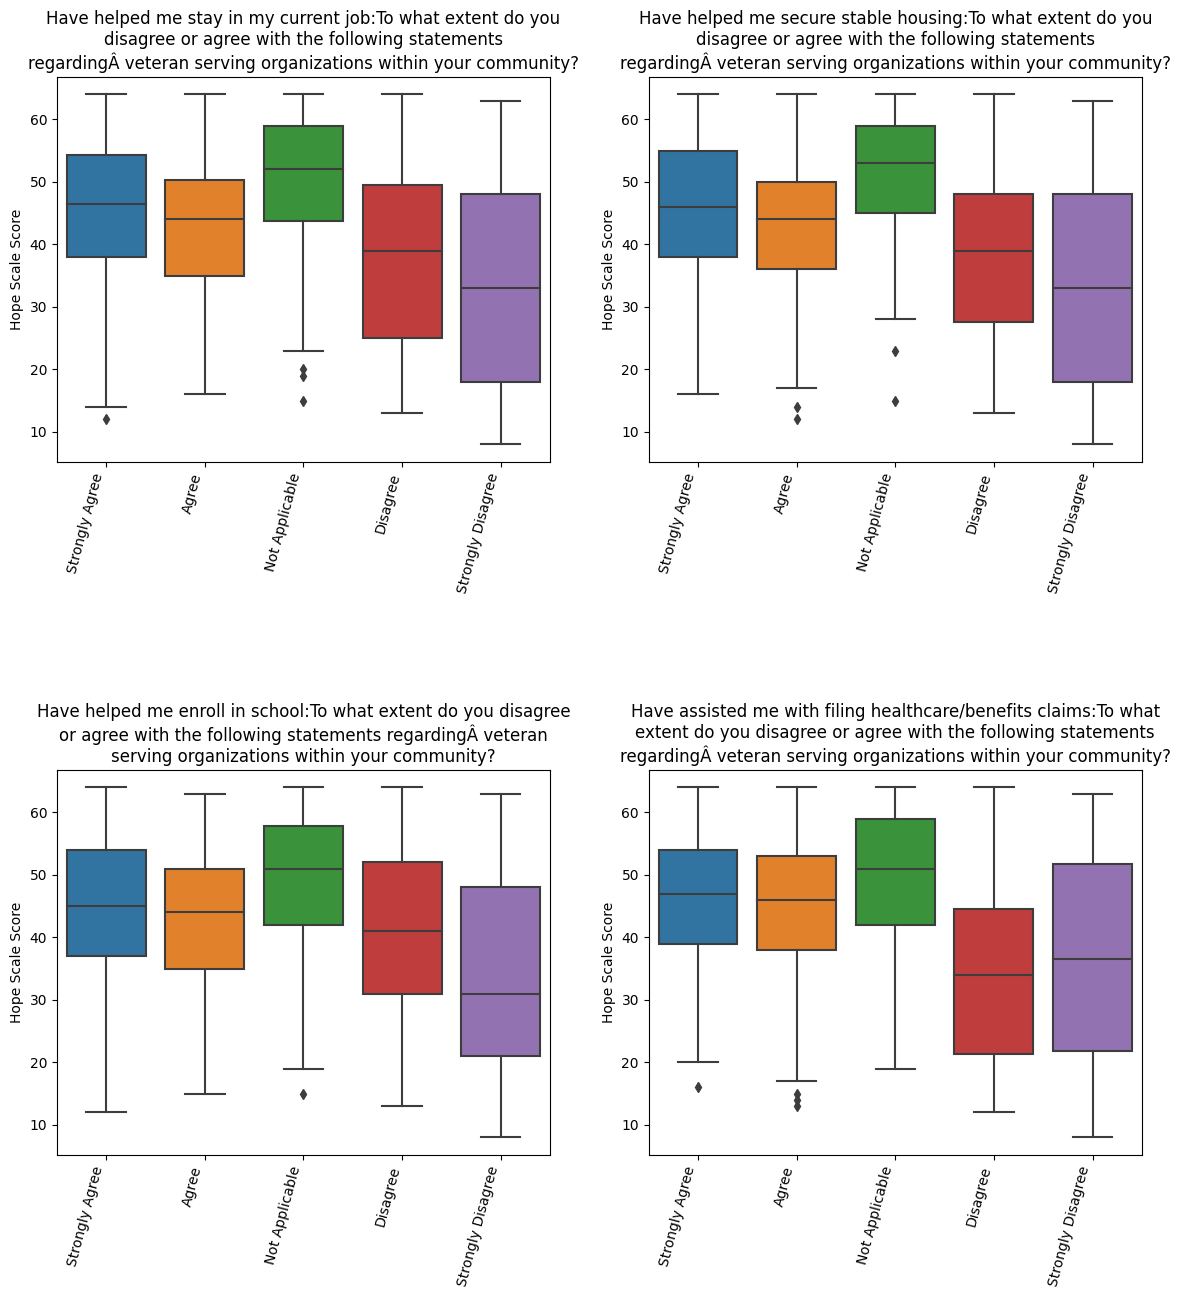

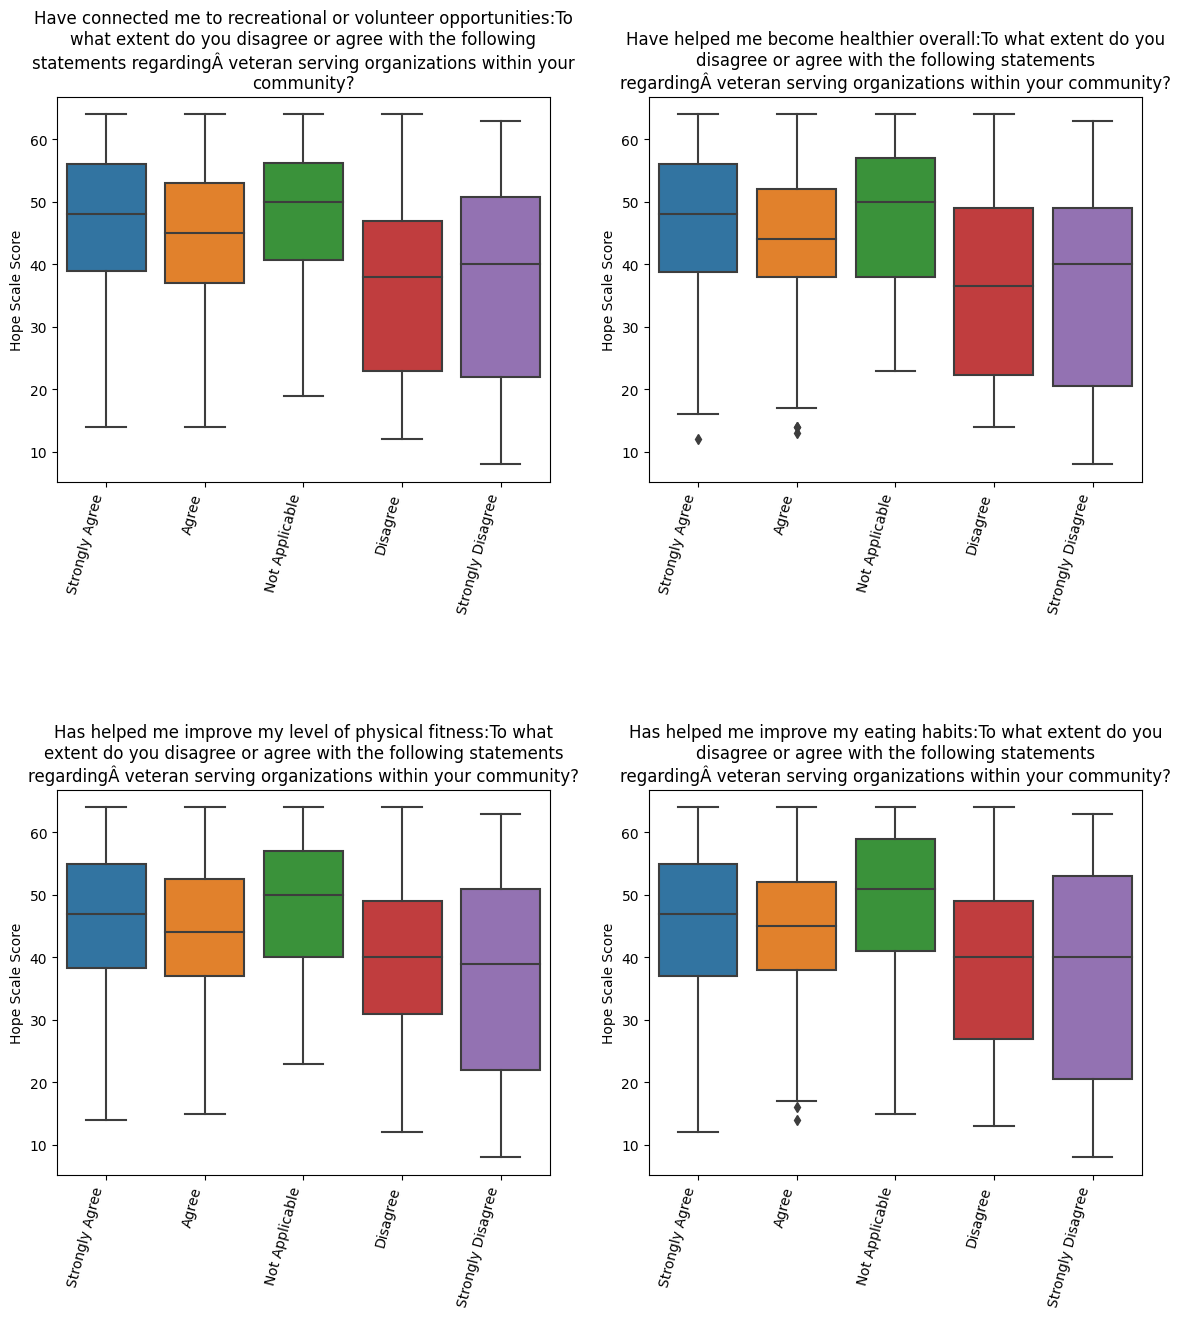

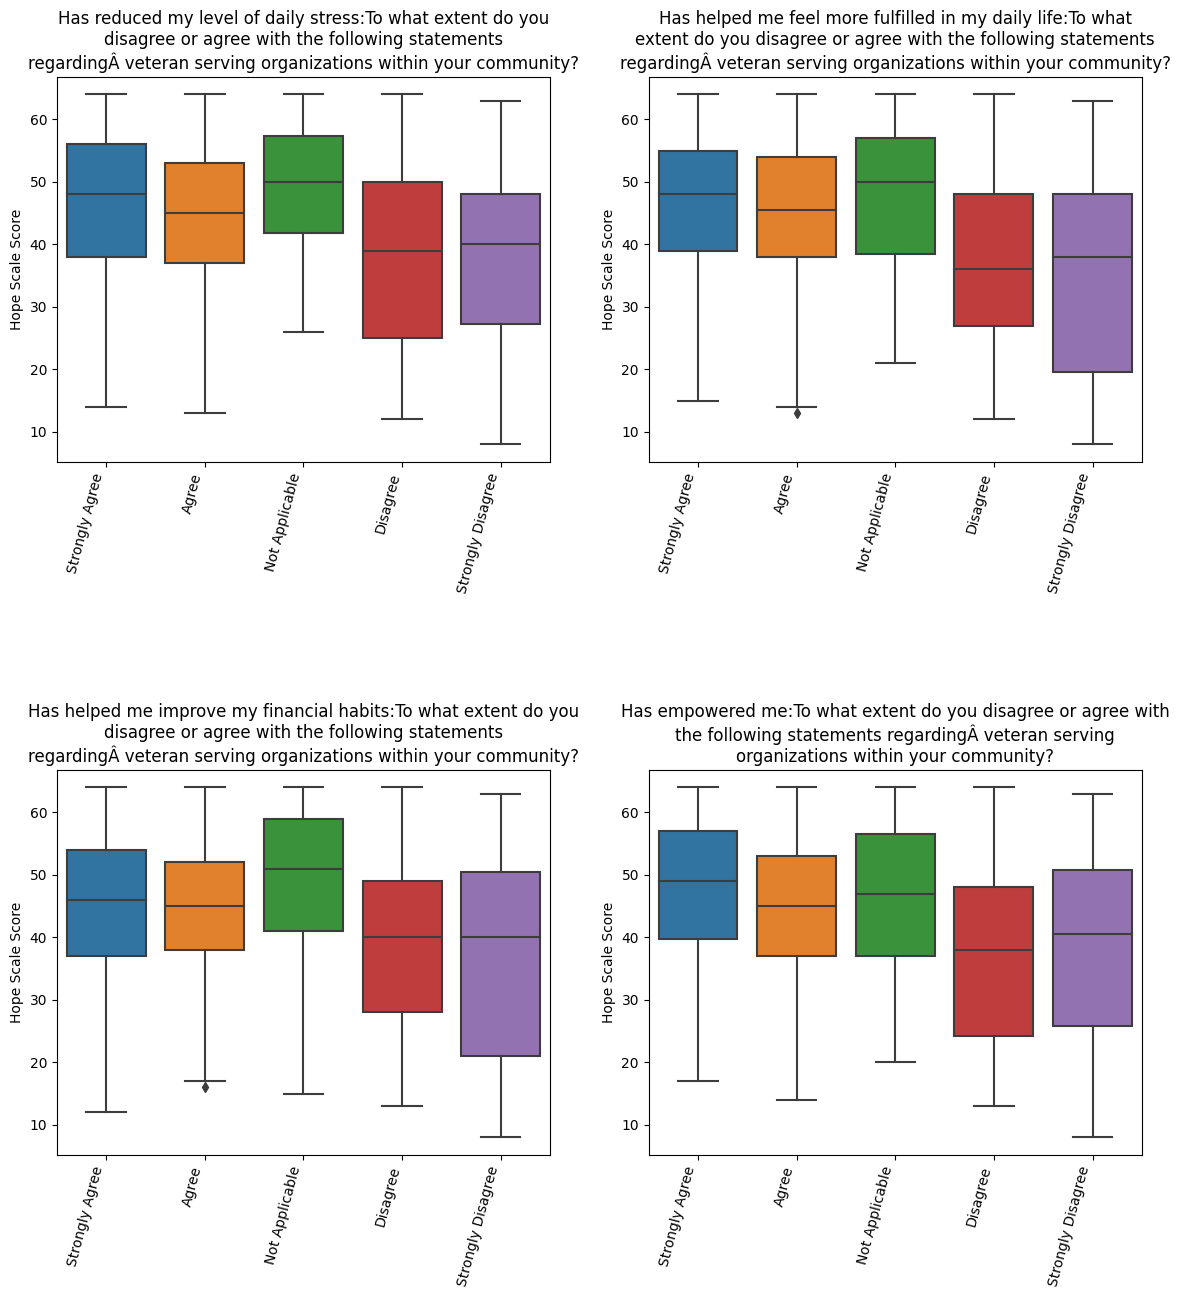

In [7]:
df_orig_military = df_orig_military.sort_values('Hope Scale Score')

fig, axs = plt.subplots(2, 2, gridspec_kw = {'hspace' : .5}, figsize = (14,14))
ax2 = [y for x in axs for y in x]
plt_cnt = 0
ax_cnt = 0
for label in df_orig_military:
    if not 'agree' in label.lower() or not any('agree' in str(x).lower() for x in df_orig_military[label].unique()):
        continue
    nun = df_orig_military[label].nunique()
    if nun <= 2:
        continue
    if ax_cnt == 4:
        ax_cnt = 0
        plt.savefig(f'plots_2022/AgreePlot_{plt_cnt}.png')
        fig, axs = plt.subplots(2, 2,gridspec_kw = {'hspace' : .8}, figsize = (14,14))
        ax2 = [y for x in axs for y in x]
        plt_cnt+=1
    ax = ax2[ax_cnt]
    ax_cnt += 1
    sns.boxplot(data = df_orig_military, x = label, y = 'Hope Scale Score', order = ['Strongly Agree', 
                                                                            'Agree', 
                                                                            'Not Applicable',
                                                                            'Disagree',
                                                                            'Strongly Disagree'], ax = ax)
    ax.set(title = resize(label,65), xlabel = '')
    ax.set_xticks(ax.get_xticks())
    labels = [x for x in ax.get_xticklabels()]
    for x in labels: x.set_text(x.get_text()[:25] + ('...' if len(x.get_text())>=25 else ''))
    ax.set_xticklabels(labels, rotation=75, ha='right')

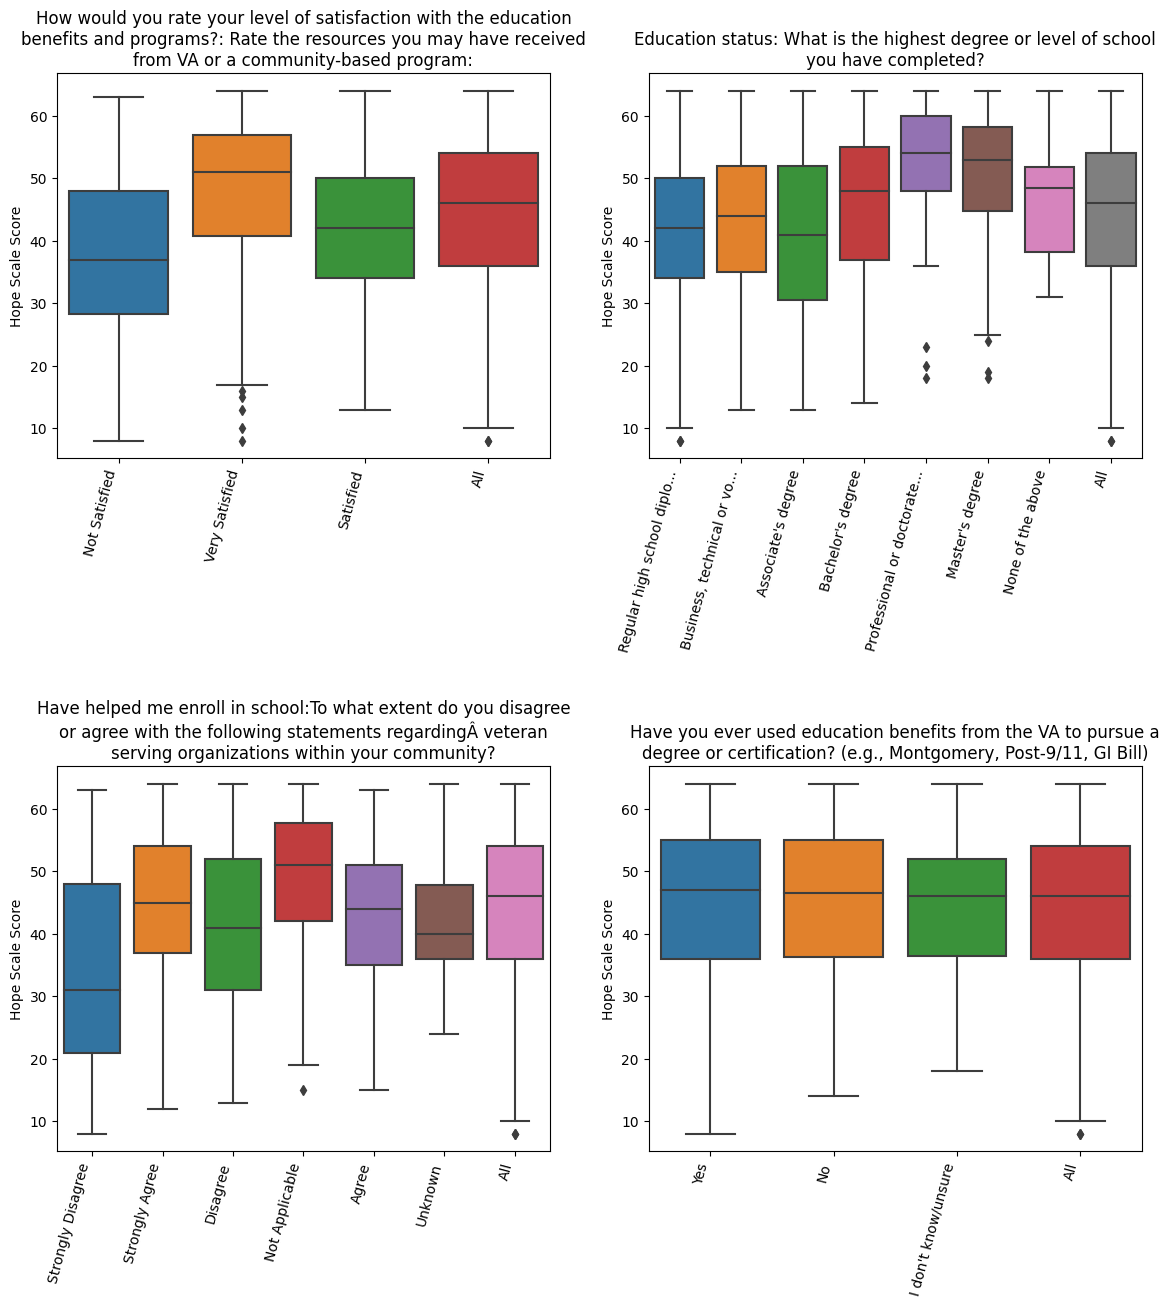

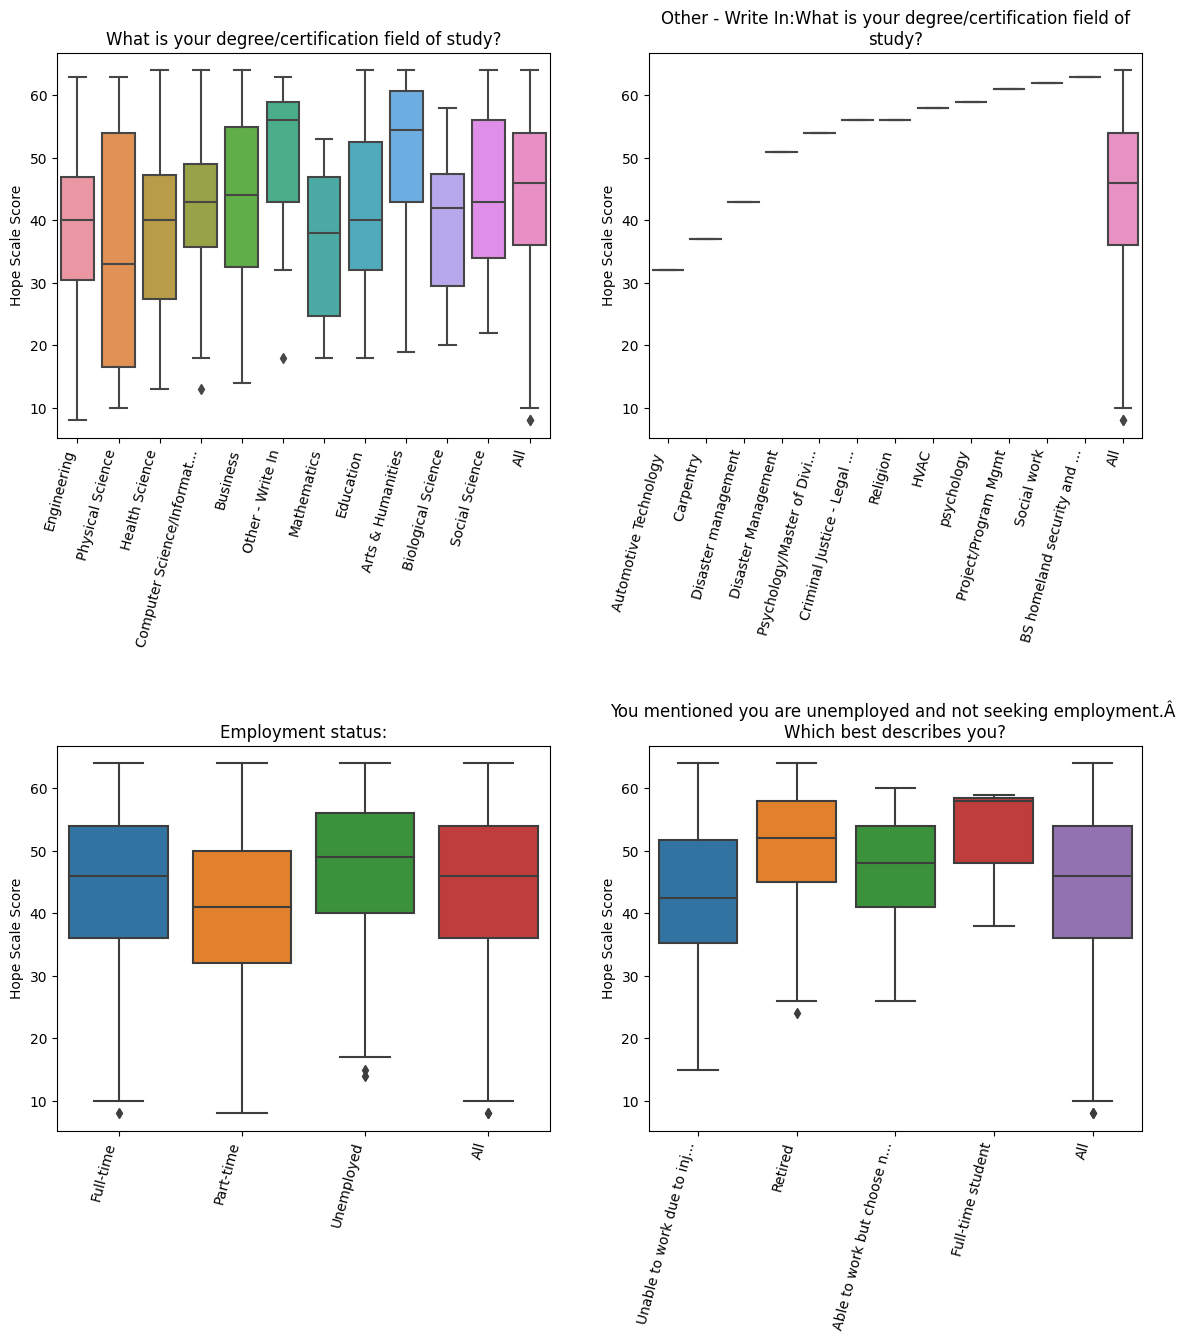

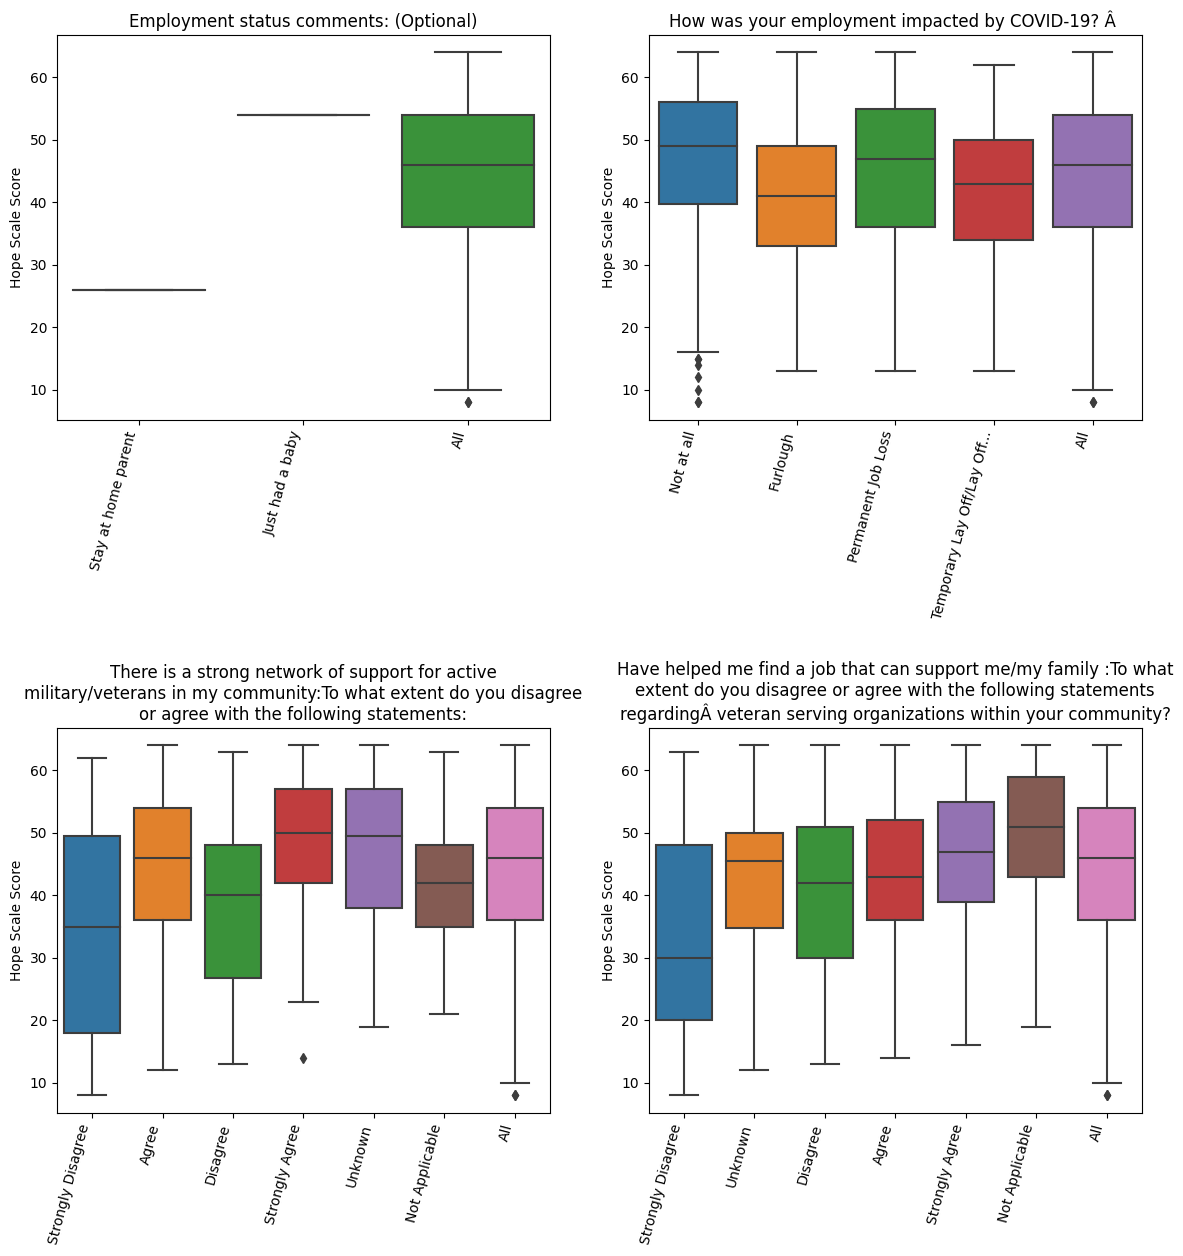

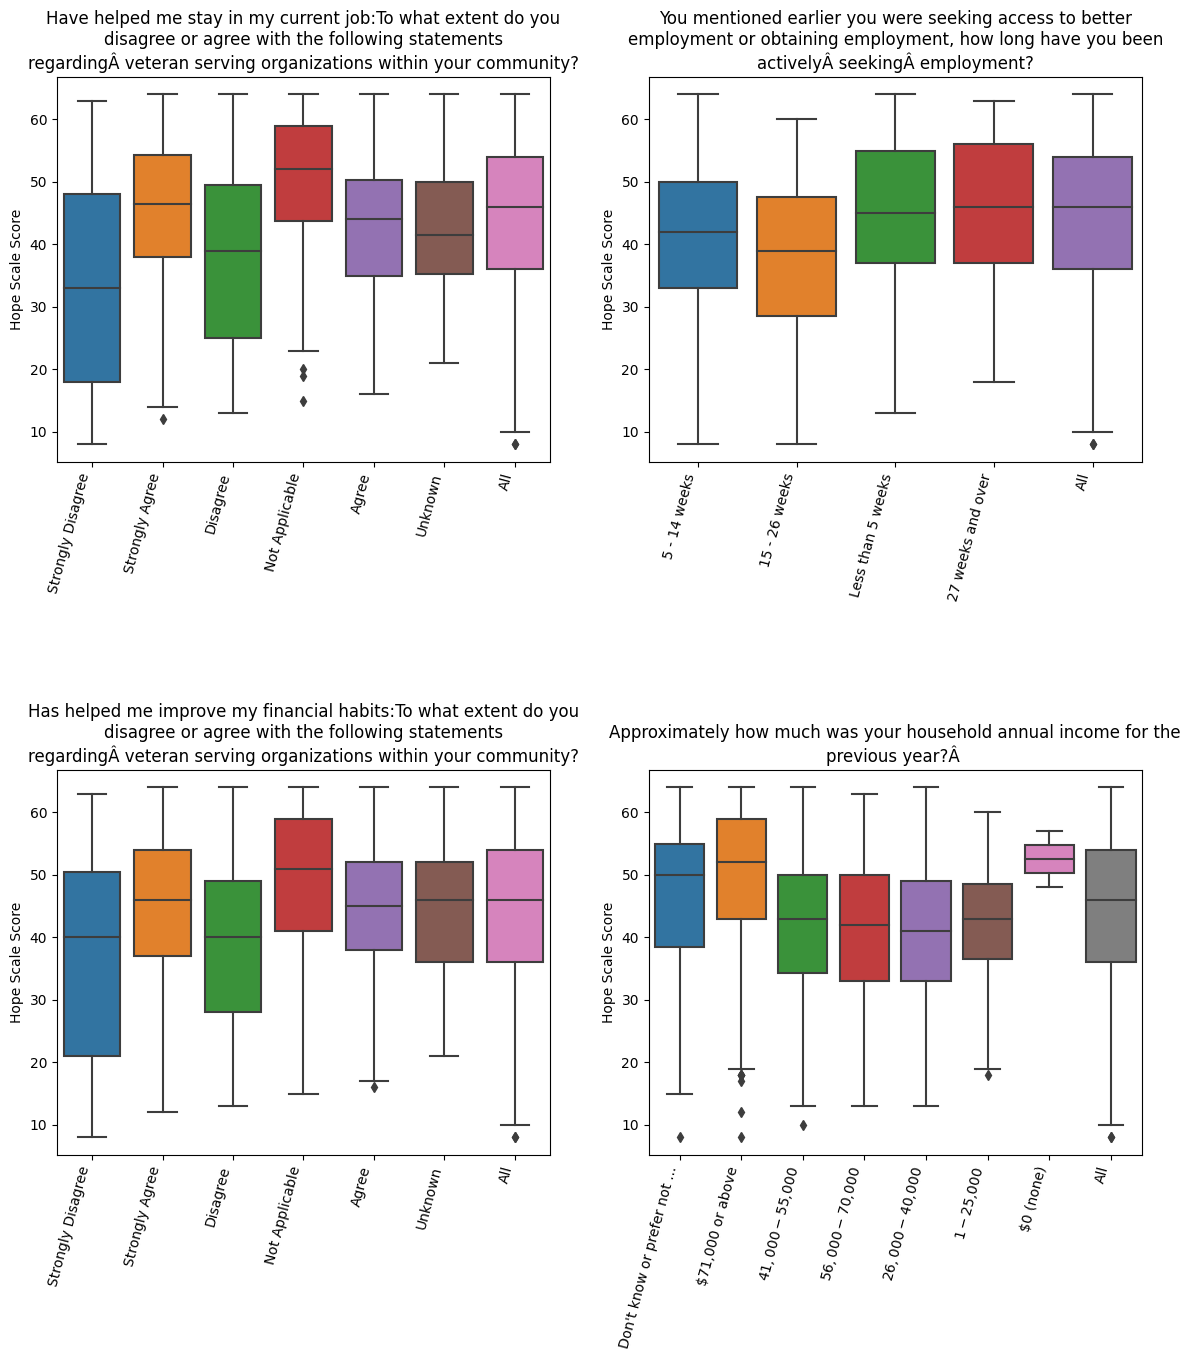

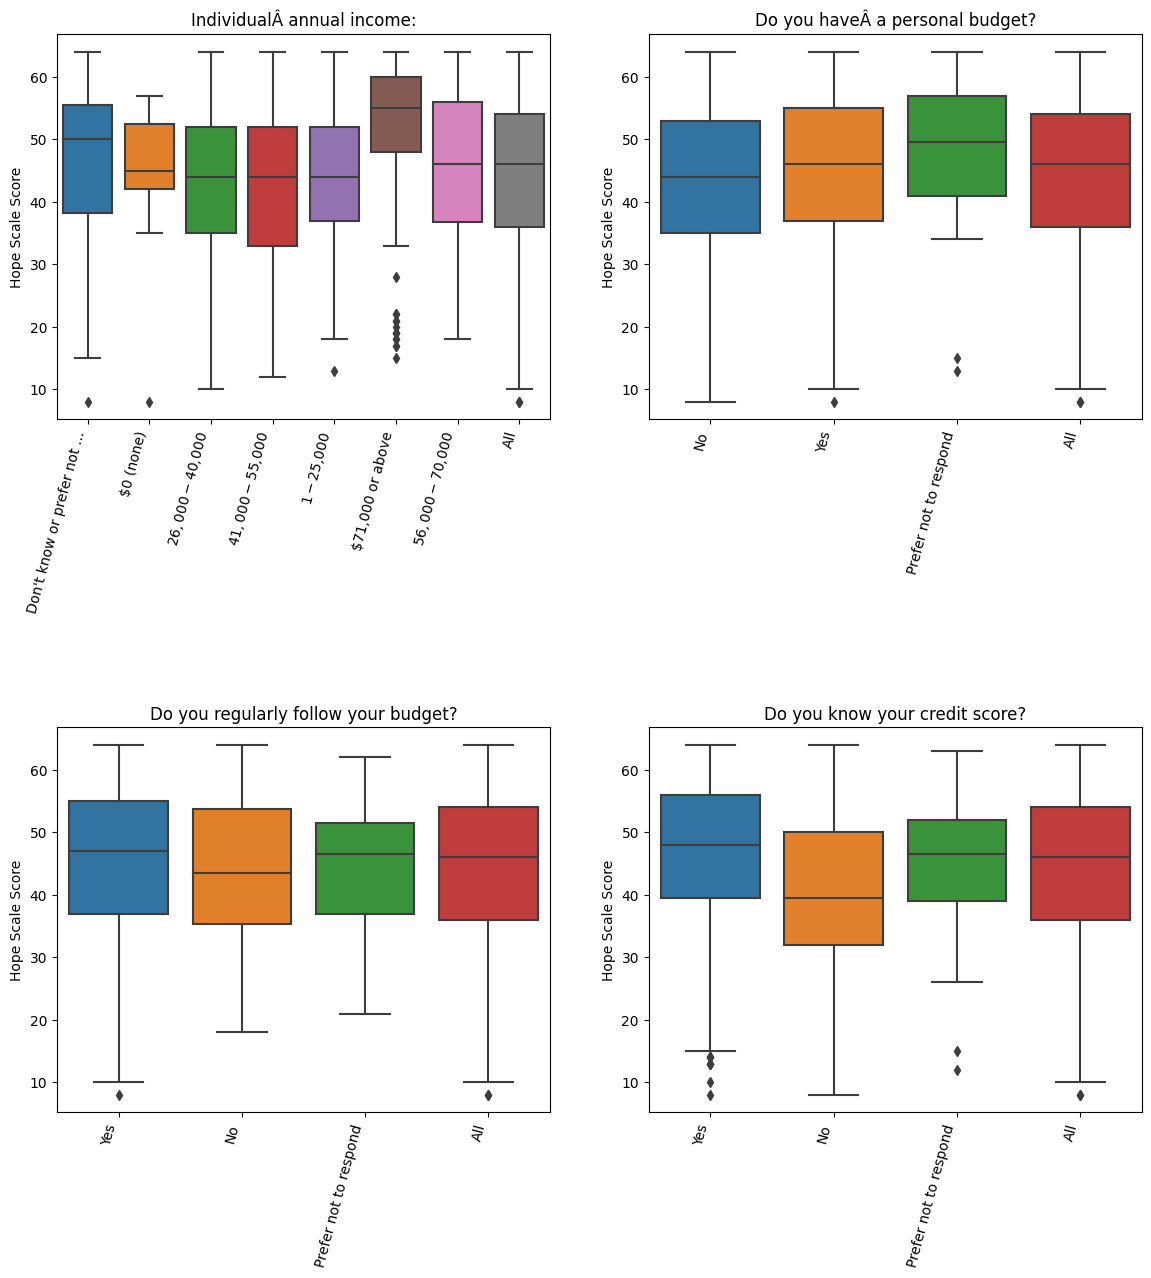

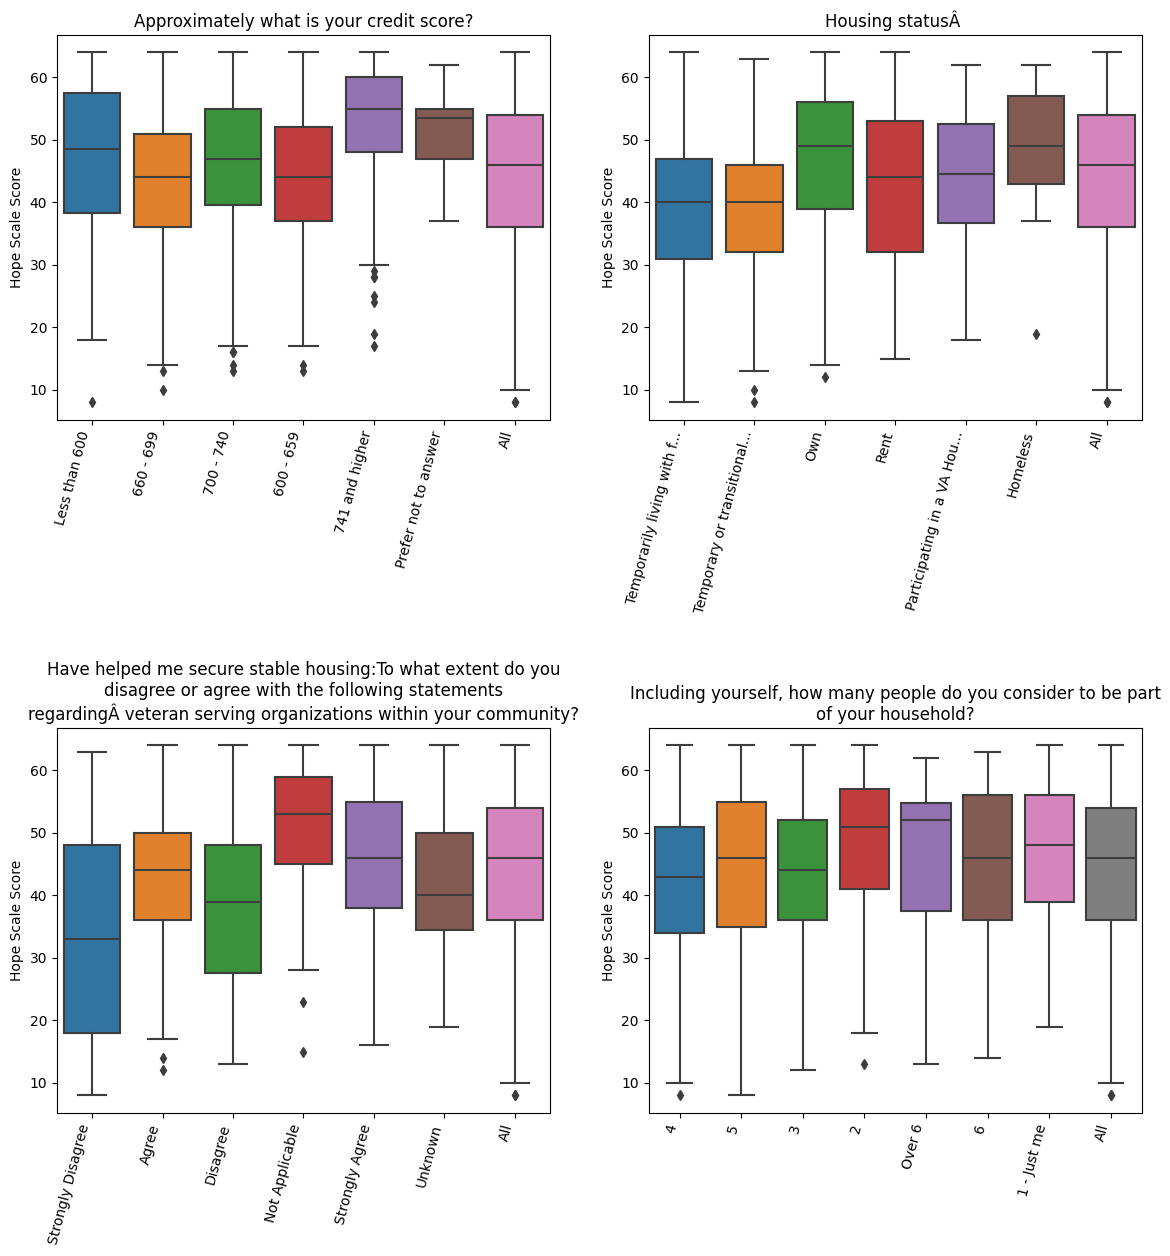

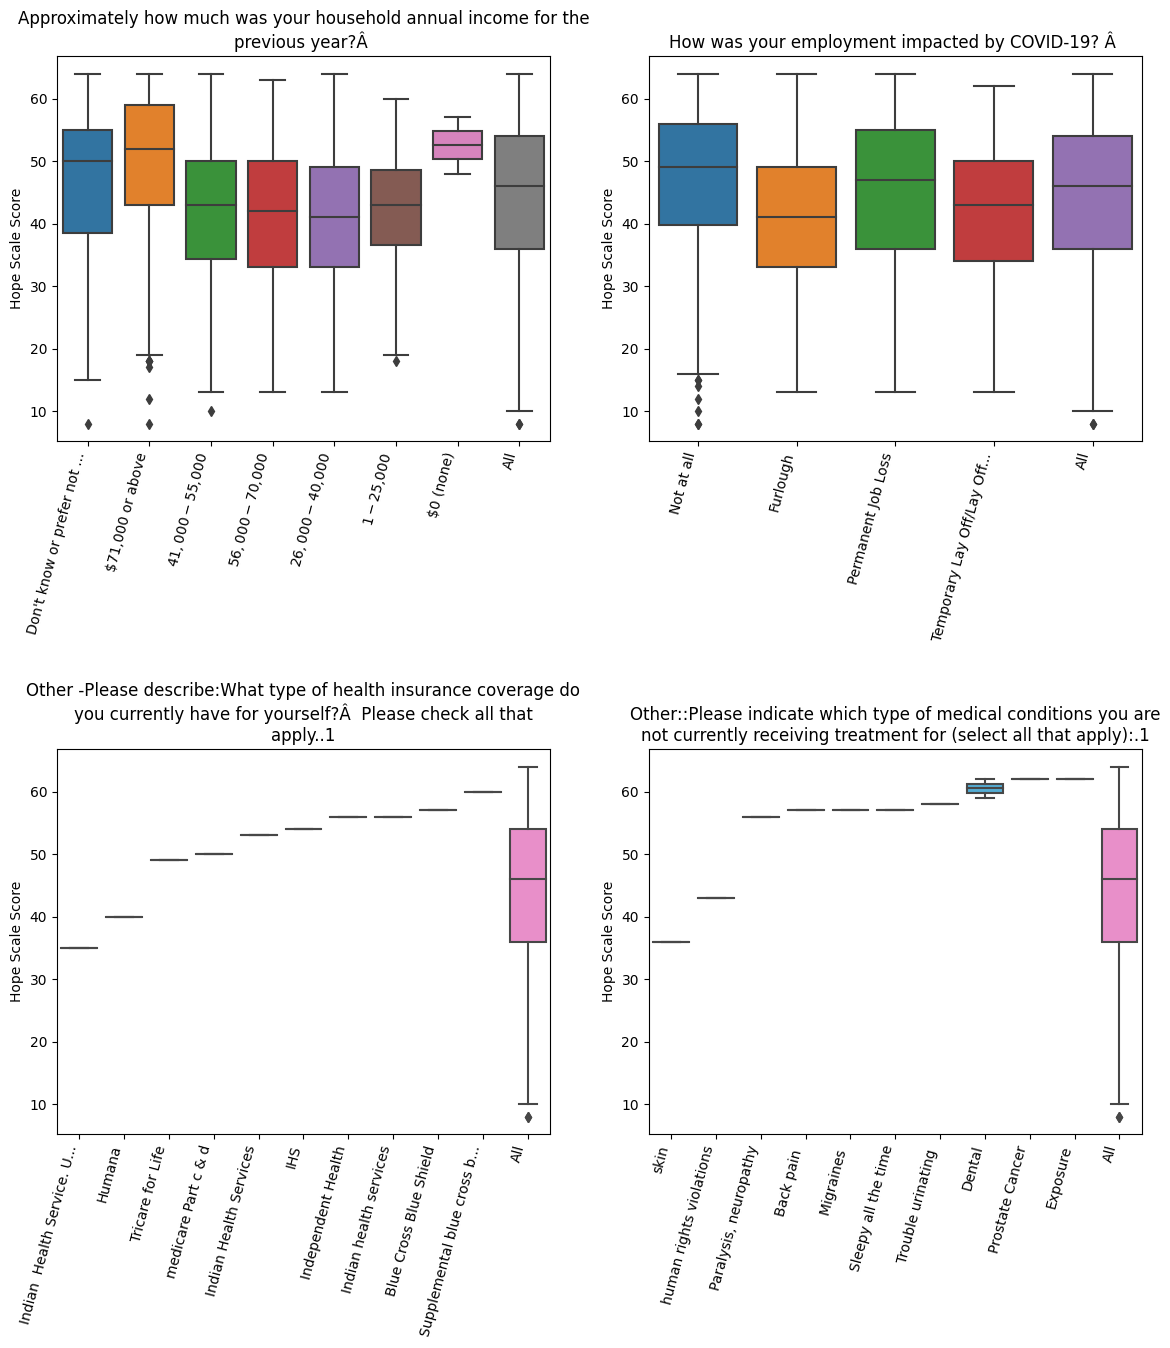

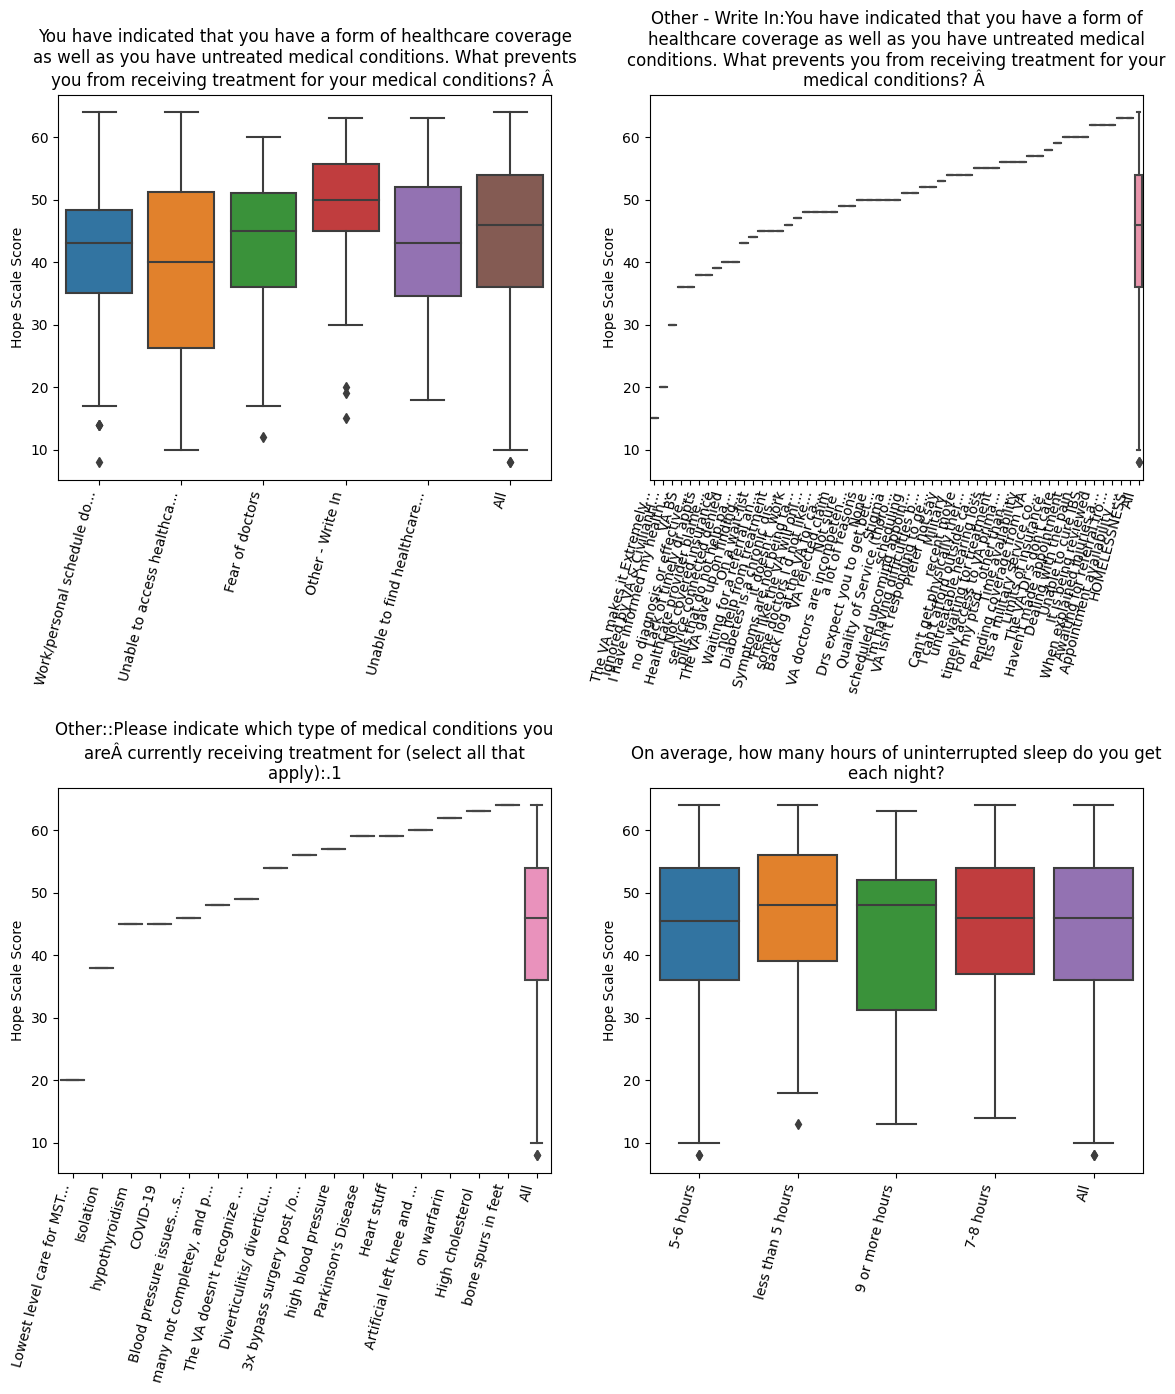

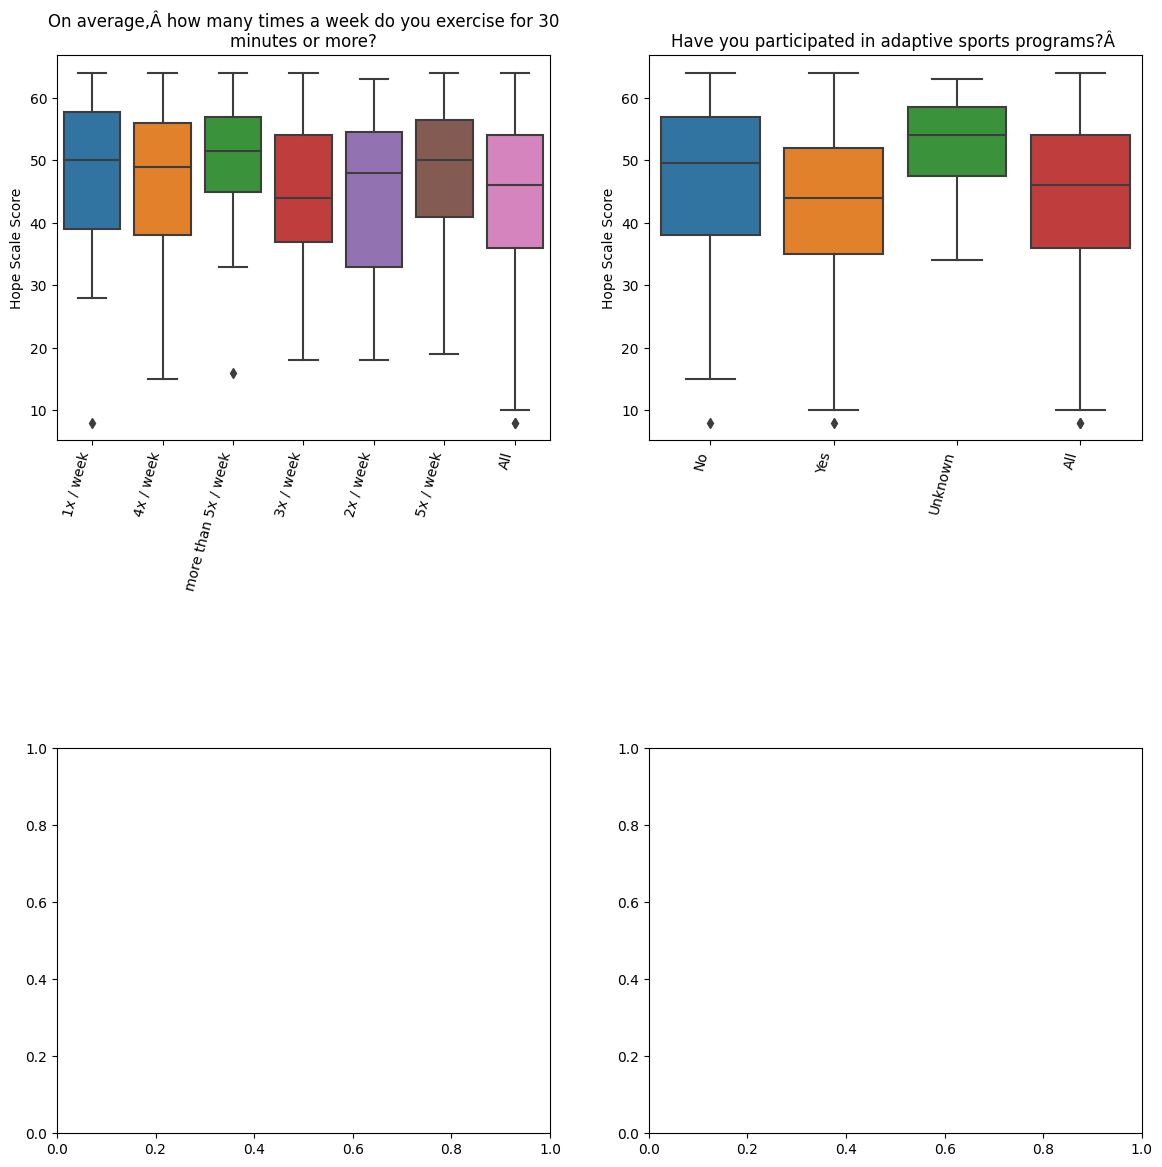

In [14]:
df_orig_military = df_orig_military.sort_values('Hope Scale Score')
fig, axs = plt.subplots(2, 2, gridspec_kw = {'hspace' : .8}, figsize = (14,14))
ax2 = [y for x in axs for y in x]
plt_cnt = 0
ax_cnt = 0
    
for labelType in labels_dict:
    for label in labels_dict[labelType]:
        if not label in df_orig_military:
            continue
        nun = df_orig[label].nunique()
        if nun <= 2:
            continue
        if ax_cnt == 4:
            ax_cnt = 0
            plt.savefig(f'plots_2022/{labelType}_{plt_cnt}.png')
            fig, axs = plt.subplots(2, 2,gridspec_kw = {'hspace' : .8}, figsize = (14,14))
            ax2 = [y for x in axs for y in x]
            plt_cnt+=1
        ax = ax2[ax_cnt]
        ax_cnt += 1
        sns.boxplot(data = pd.concat([df_orig_military,
                                      df_orig_military.drop(columns = label).rename(
                                          columns = {'All' : label})], ignore_index = True), x = label, y = 'Hope Scale Score', ax = ax)
        ax.set(title = resize(label,65), xlabel = '')
        ax.set_xticks(ax.get_xticks())
        labels = [x for x in ax.get_xticklabels()]
        for x in labels: x.set_text(x.get_text()[:25] + ('...' if len(x.get_text())>=25 else ''))
        ax.set_xticklabels(labels, rotation=75, ha='right')

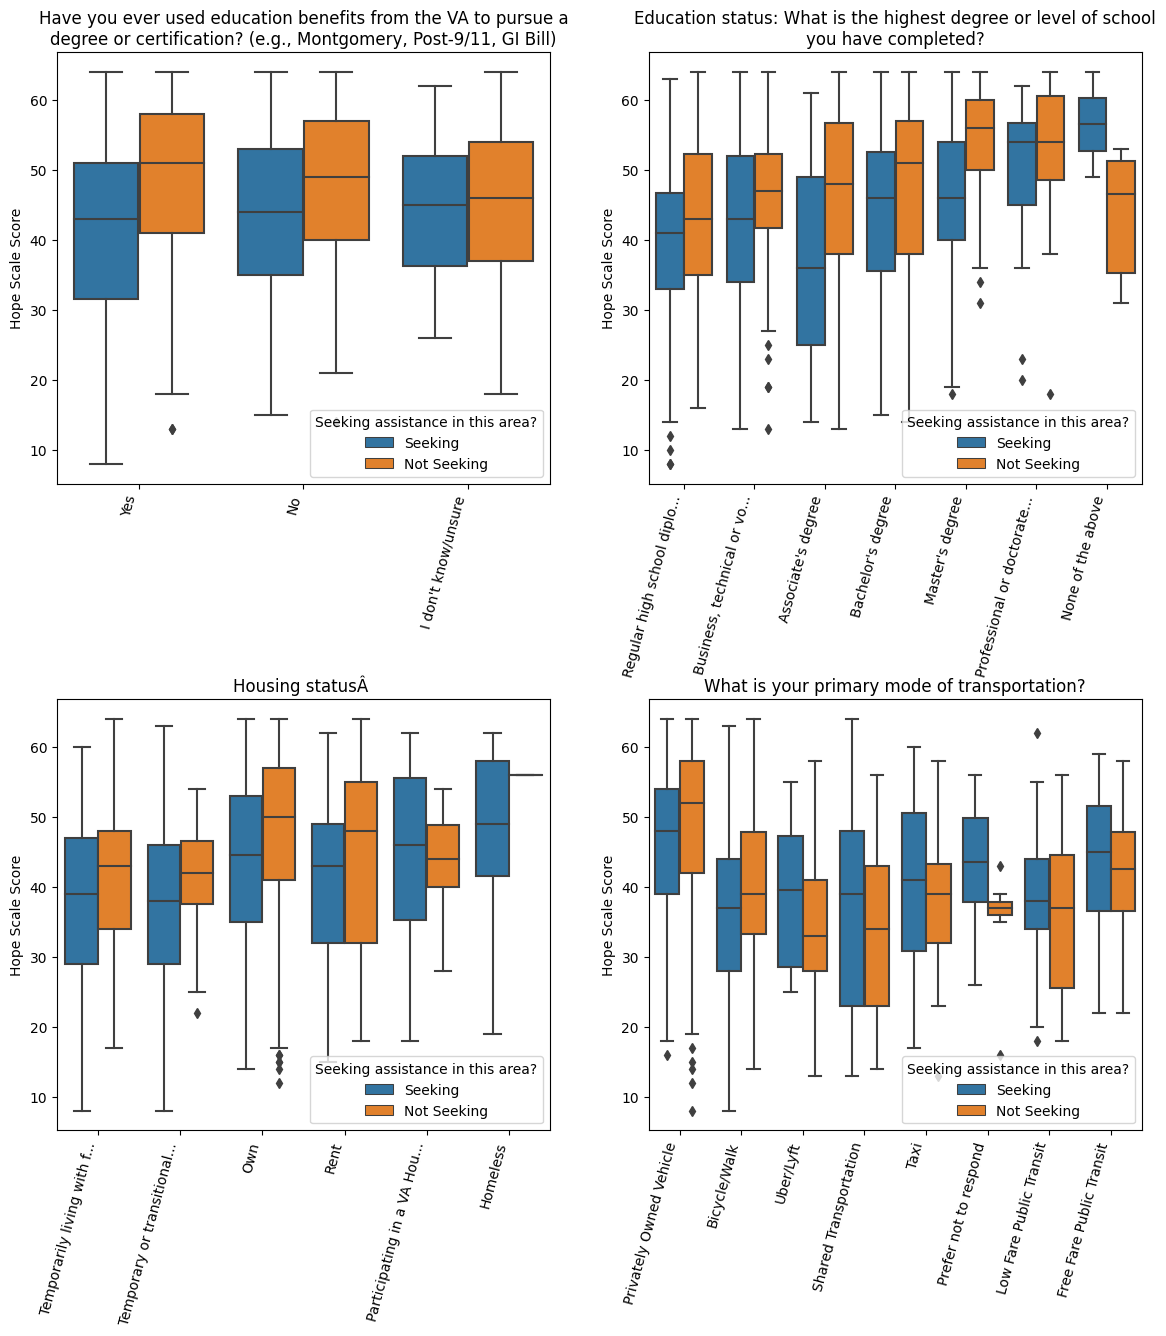

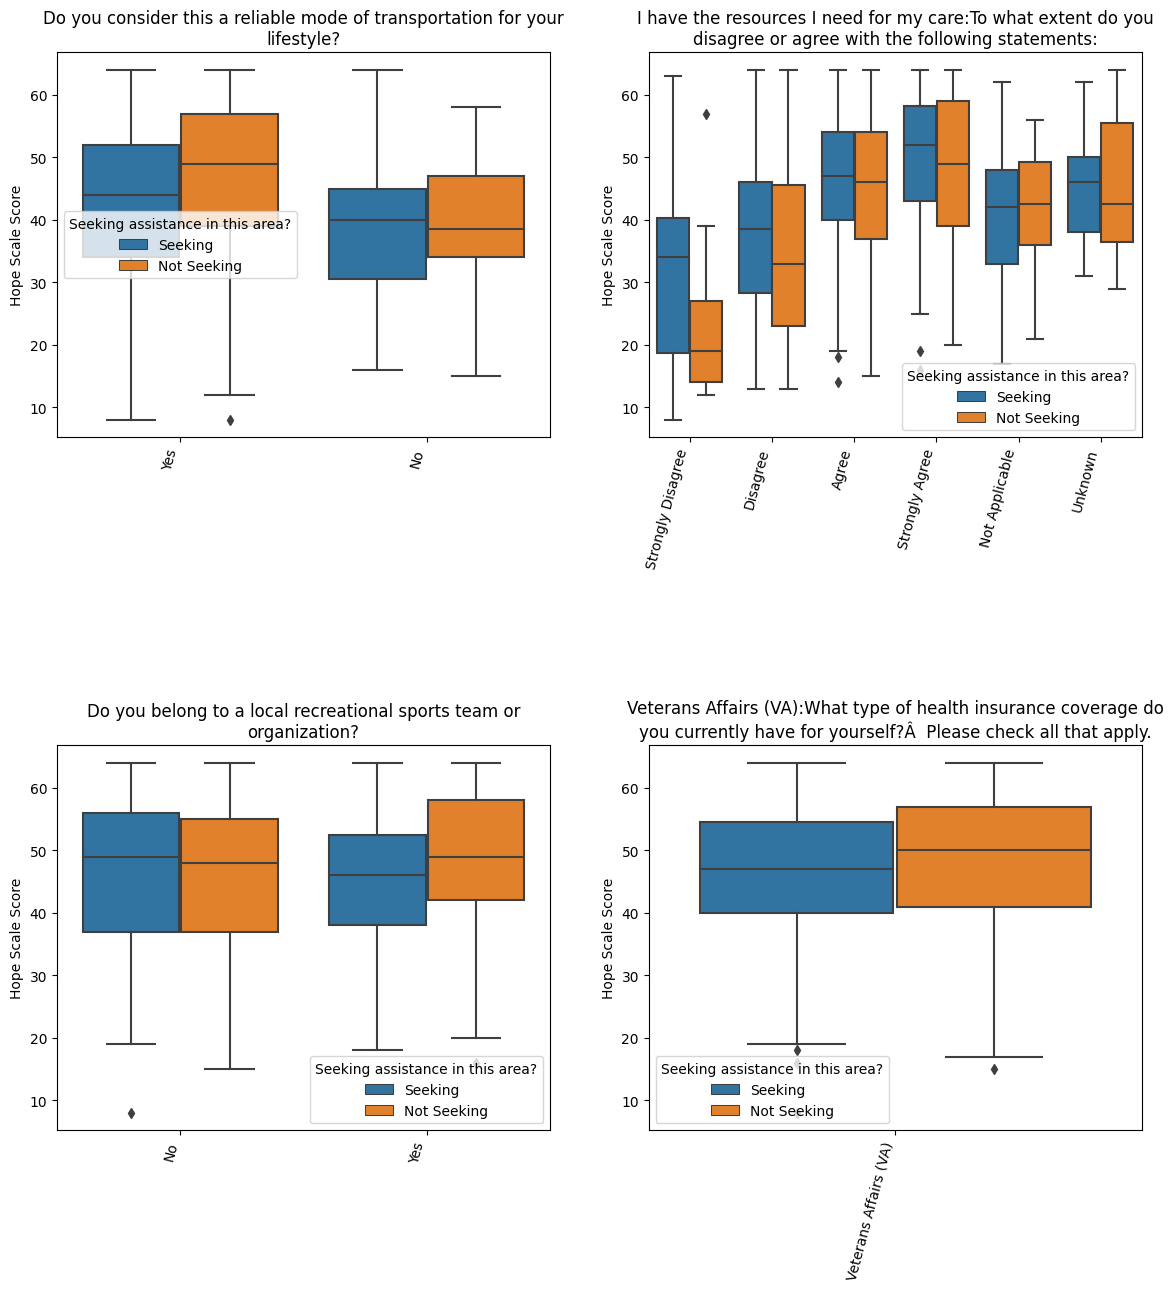

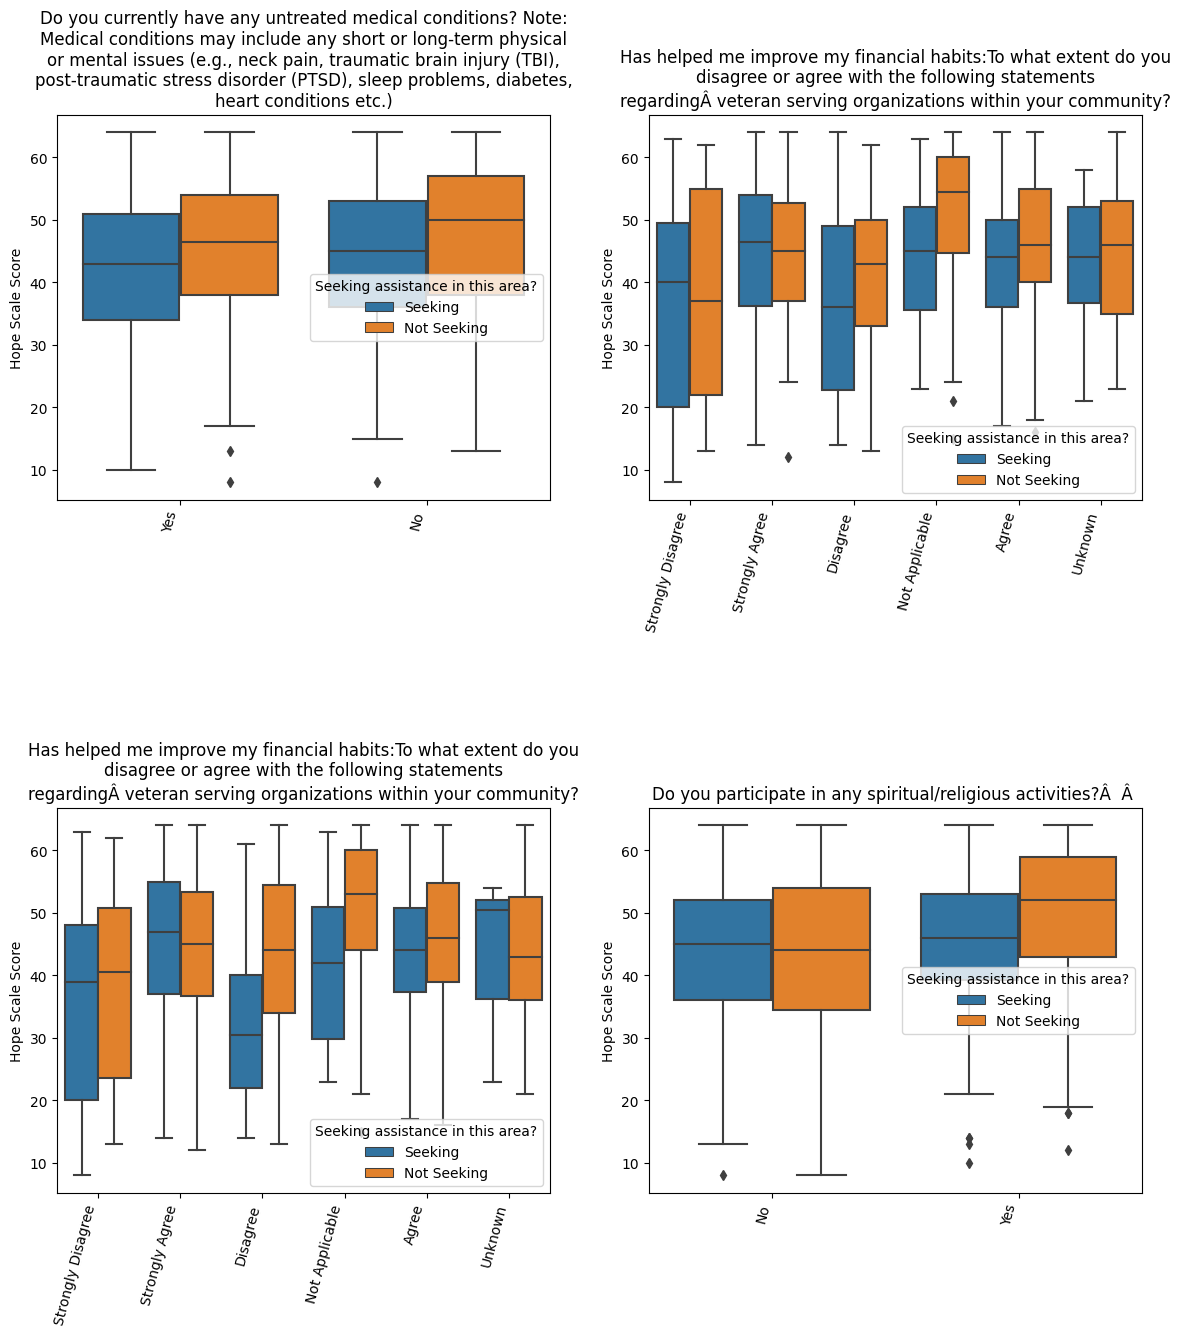

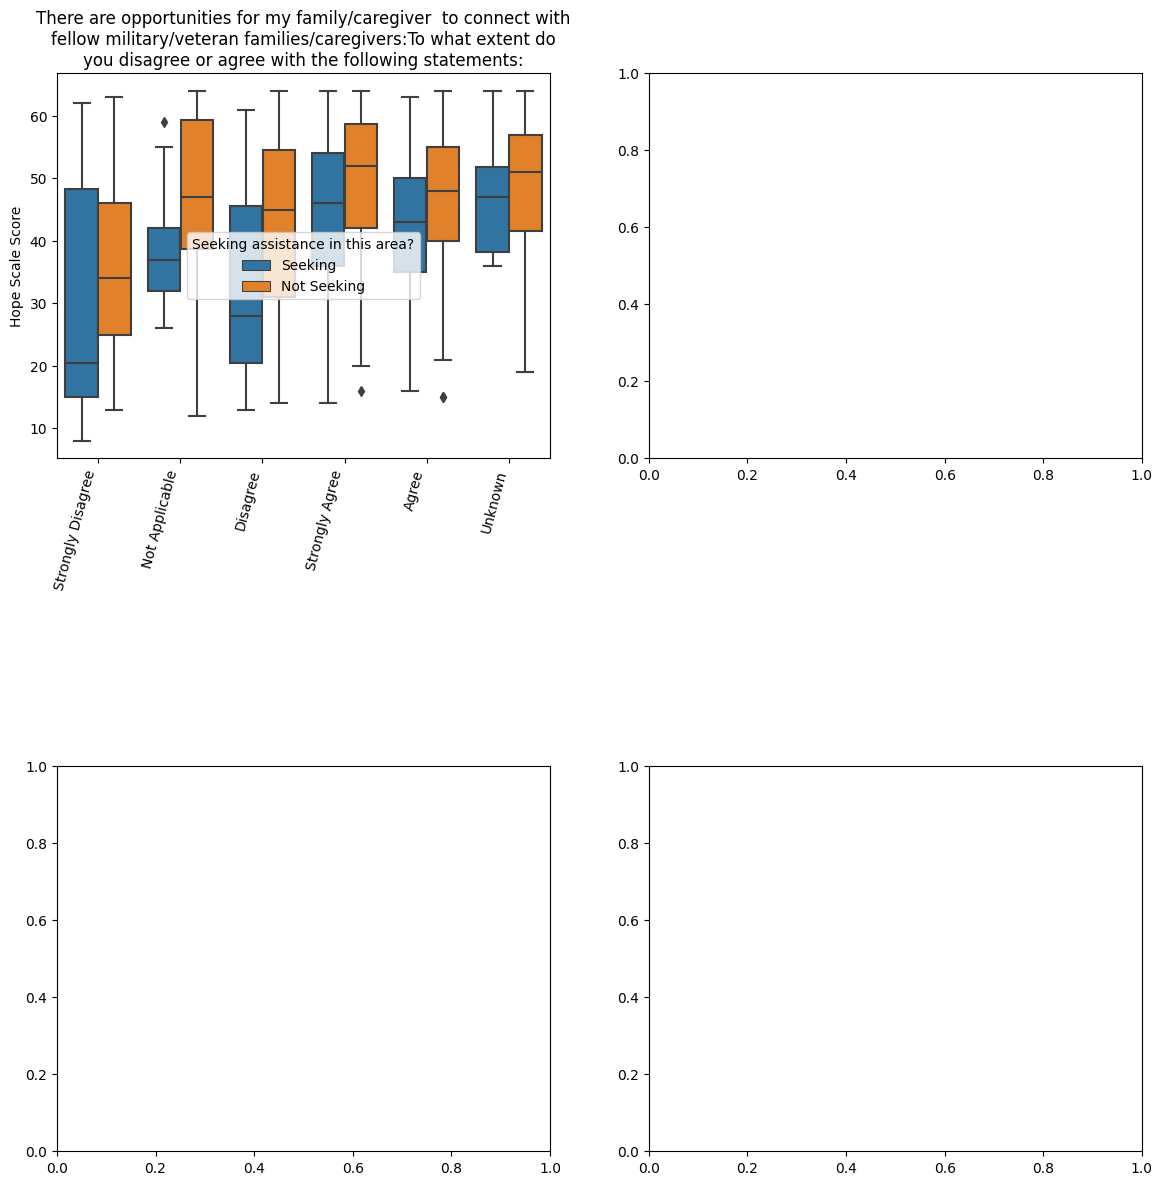

In [39]:
question_pairings = {
    "Education benefits (e.g., Montgomery, Post-9/11, GI Bill) - for my family  or myself:What information or resources are you seeking (Select all that apply)?":
                     ["Have you ever used education benefits from the VA to pursue a degree or certification? (e.g., Montgomery, Post-9/11, GI Bill)",
                      "Education status: What is the highest degree or level of school you have completed?"],
    
    "New housing:What information or resources are you seeking (Select all that apply)?" : "Housing statusÂ\xa0",
    "Better transportation:What information or resources are you seeking (Select all that apply)?" : [
                                    'What is your primary mode of transportation?',
                                'Do you consider this a reliable mode of transportation for your lifestyle?'
    ],
    "Opportunities for me to connect with other military/veteran service members and families/caregivers:What information or resources are you seeking (Select all that apply)?" :
        'I have the resources I need for my care:To what extent do you disagree or agree with the following statements:',
    "Opportunities for recreational or other physical activities:What information or resources are you seeking (Select all that apply)?":
                    'Do you belong to a local recreational sports team or organization?',
    "Health and benefits (VA or non-VA) (e.g., Enrollment):What information or resources are you seeking (Select all that apply)?":
                            'Veterans Affairs (VA):What type of health insurance coverage do you currently have for yourself?Â\xa0 Please check all that apply.',
    "Physical health treatment and/or resources and support (e.g., Better access to scheduled appointments):What information or resources are you seeking (Select all that apply)?" :
            'Do you currently have any untreated medical conditions? Note: Medical conditions may include any short or long-term physical or mental issues (e.g., neck pain, traumatic brain injury (TBI), post-traumatic stress disorder (PTSD), sleep problems, diabetes, heart conditions etc.)',
    "Resources/classes on financial counseling (e.g., how to maintain strong finances):What information or resources are you seeking (Select all that apply)?" : 
                    "Has helped me improve my financial habits:To what extent do you disagree or agree with the following statements regardingÂ\xa0veteran serving organizations within your community?",
    "Short-term financial assistance (e.g., to address utility bills, etc.):What information or resources are you seeking (Select all that apply)?" :
   "Has helped me improve my financial habits:To what extent do you disagree or agree with the following statements regardingÂ\xa0veteran serving organizations within your community?",
    "Spirituality resources and support:What information or resources are you seeking (Select all that apply)?":
    'Do you participate in any spiritual/religious activities?Â\xa0 Â\xa0',
    "Marriage/family programs:What information or resources are you seeking (Select all that apply)?":
    'There are opportunities for my family/caregiver  to connect with fellow military/veteran families/caregivers:To what extent do you disagree or agree with the following statements:'
}
        
df_orig_military = df_orig_military.sort_values('Hope Scale Score')

fig, axs = plt.subplots(2, 2, gridspec_kw = {'hspace' : .5}, figsize = (14,14))
ax2 = [y for x in axs for y in x]
plt_cnt = 0
ax_cnt = 0
for label in question_pairings:
    items = question_pairings[label]
    if isinstance(items, str):
        items = [items]
    for label2 in items:
        if ax_cnt == 4:
            ax_cnt = 0
            plt.savefig(f'plots_2022/SeekingPlot_{plt_cnt}.png')
            fig, axs = plt.subplots(2, 2,gridspec_kw = {'hspace' : .8}, figsize = (14,14))
            ax2 = [y for x in axs for y in x]
            plt_cnt+=1
        ax = ax2[ax_cnt]
        ax_cnt += 1
        sns.boxplot(data = df_orig_military, x = label2, y = 'Hope Scale Score', hue = label, 
                    ax = ax, hue_order = ["Seeking", "Not Seeking"])
        ax.set(title = resize(label2, 65), xlabel = '')
        ax.set_xticks(ax.get_xticks())
        ax.legend().set_title("Seeking assistance in this area?")
        labels = [x for x in ax.get_xticklabels()]
        for x in labels: x.set_text(x.get_text()[:25] + ('...' if len(x.get_text())>=25 else ''))
        ax.set_xticklabels(labels, rotation=75, ha='right')
if ax_cnt != 4:
    plt.savefig(f'plots_2022/SeekingPlot_{plt_cnt}.png')

In [29]:
questions = {"Seeking Question" : [],
"Status Question" : []}
for question1 in question_pairings:
    items = question_pairings[question1]
    if isinstance(items,str):
        items = [items]
    for question2 in items:
        questions["Seeking Question"].append(question1)
        questions["Status Question"].append(question2)

In [37]:
pd.DataFrame(questions)[["Status Question","Seeking Question"]].style.hide(axis="index").set_properties(**{'text-align': 'left'})

In [25]:
def parseFileNames(string, decorator = '@|@'):
    found_files = set()
    found_decorator = False
    current_file = ''
    i = 0
    while i < len(string):
        c = string[i]
        if not found_decorator and len(string) - i - 1 < len(decorator):
            break
        if c == decorator[0]:
            is_decorator = all(string[i+j] for j, x in enumerate(decorator))
            if is_decorator:
                if found_decorator:
                    found_files.add(current_file)
                    current_file = ''
                found_decorator = not found_decorator
                i += len(decorator)
                c = string[i]
        if found_decorator:
            current_file += c
            
        i+=1
    return found_files

In [28]:
def AddPlotsToHTML(html_path, output_path = None):
    if not output_path:
        output_path = html_path.split('.')[0] + '_plots.html'
    with open(html_path) as f:
        data = f.read()
    PlotFiles = parseFileNames(data)
    for file in PlotFiles:
        with open(file) as f:
            plot = f.read()
        data = data.replace('@|@' + file + '@|@', plot)
    soup = bs(data)
    prettyHtml
    with open(output_path, 'w') as f:
        f.write(data)

In [817]:
AddPlotsToHTML("Report.html")

In [741]:
df_results = pd.read_csv('Data/Results.csv')
df_results['Hope Scale Score Bin'] = 10*(df_results['Predicted Hope Scale Score']//10)
df_results_pred = df_results[df_results['With Intervention'] == 'After Intervention']
df_results_ob = df_results[df_results['With Intervention'] == 'Observed']
df_results_pred['Diff'] = df_results_pred["Predicted Hope Scale Score"] - df_results_pred["Hope Scale Score"]

C:\Users\Sean\AppData\Local\Temp\ipykernel_21148\3469967718.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [806]:
div_stack

['!DOCTYPE',
 'html',
 'head',
 'meta',
 'meta',
 'title',
 'style',
 'body',
 '!DOCTYPE',
 'html',
 'div',
 'div',
 'h1',
 'center',
 'img',
 'p',
 'p',
 'p',
 'div',
 'div',
 'div',
 'div',
 'div',
 'div',
 'div',
 'div',
 'div',
 'div',
 'h3',
 'ol',
 'li',
 'a',
 'ol',
 'li',
 'a',
 'li',
 'a',
 'ol',
 'li',
 'a',
 'li',
 'a',
 'ol',
 'li',
 'a',
 'li',
 'a',
 'li',
 'a',
 'div',
 'h2',
 'div',
 'div',
 'h3',
 'p',
 'b',
 'p',
 'sup',
 'a',
 'h2',
 'p',
 'h3',
 'div',
 'div',
 'div',
 'div',
 'script',
 'script',
 'div',
 'script',
 'br',
 'extra',
 'div',
 'div',
 'div',
 'script',
 'script',
 'div',
 'script',
 'br',
 'extra',
 'div',
 'div',
 'div',
 'script',
 'script',
 'div',
 'div',
 'div',
 'svg',
 'defs',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'div',
 'svg',
 'defs',
 'g',
 'clipPath',
 'rect',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'rect',
 'g',
 'g',
 'g',
 'text',
 'g',
 'g',
 'g',
 'g',
 'g',
 'p

In [816]:
with open("Report_plots.html") as f:
    data = f.read()
div_stack = []
cnt = 0
for line in data.split("\n"):
    cnt+=1
    line = line.split('<')
    for div in line[1:]:
        div_type = div.split('>')[0]
        if div_type.split()[0] in ['meta', "img", "br"]: continue
        if div_type[0] == '/' and div_type[1:] == div_stack[-1]:
            div_stack = div_stack[:-1]
        elif div_type[0] == '/':
            print("Missing div", div_stack[-1], cnt)
        else:
            div_stack.append(div_type.split(' ')[0])

Missing div html 463


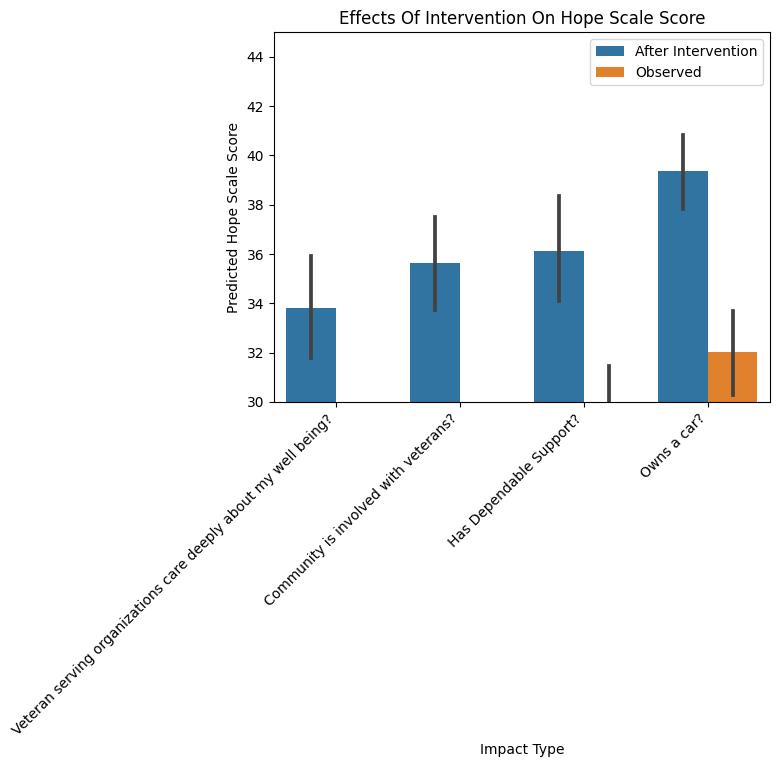

In [435]:
ax = sns.barplot(data = df_results, y = 'Predicted Hope Scale Score', x = "Impact Type", hue = 'With Intervention')
ax.legend(title=None)
ax.set(ylim = (30, 45), title = "Effects Of Intervention On Hope Scale Score")
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')

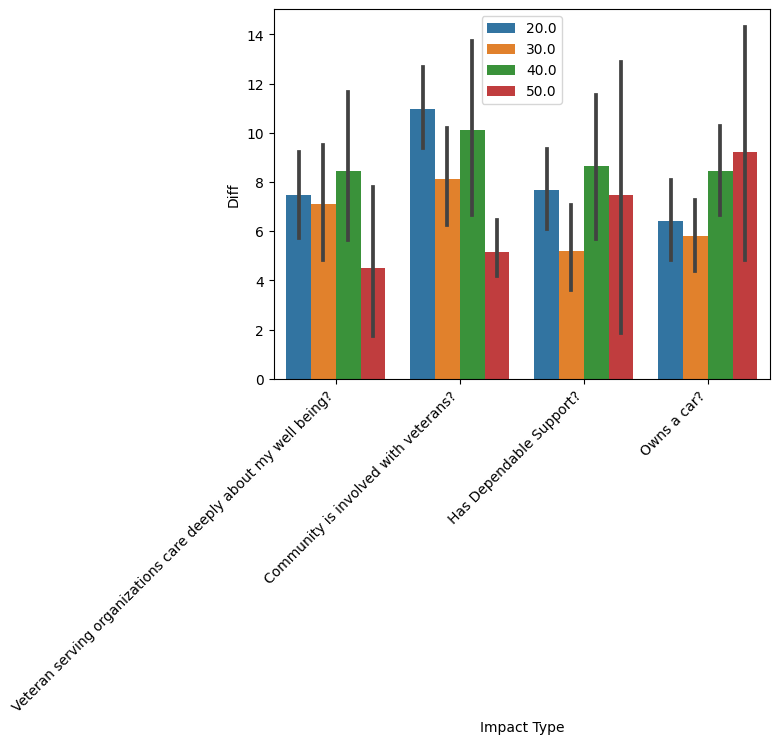

In [436]:
ax = sns.barplot(data = df_results_pred, y = 'Diff', x = "Impact Type", hue = 'Hope Scale Score Bin')
ax.legend(title=None)
#ax.set(ylim = (0, 15), title = "Effects Of Intervention On Hope Scale Score")
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')

In [531]:
per_agree = []
cols = [x for x in df_orig_military if 'disagree' in x.lower()]
hope_scale_scores_agree = []
hope_scale_scores_disagree = []
for col in cols:
    df_tmp = df_orig_military[col].dropna()
    df_tmp2 = df_orig_military[df_orig_military.index.isin(df_tmp.index)]
    df_agree = (df_tmp.str.contains(' agree') | (df_tmp == 'Agree'))
    agree_amount = (df_agree).sum()
    
    per_agree.append(round(agree_amount/len(df_tmp),2))
    hope_scale_scores_agree.append(df_tmp2[df_agree]["Hope Scale Score"].mean())
    hope_scale_scores_disagree.append(df_tmp2[~df_agree]["Hope Scale Score"].mean())

In [383]:
df_tmp

0       False
1       False
2       False
3        True
4        True
        ...  
1366    False
1367    False
1368    False
1369     True
1370     True
Name: My community is invested in active military/veterans:To what extent do you disagree or agree with the following statements:_Agree?, Length: 1371, dtype: bool

In [532]:
df_agree = pd.DataFrame({"Percent Agree" : per_agree, 
                         "Statement" : cols, 
                         "Agree" : hope_scale_scores_agree,
                         "Do Not Agree" : hope_scale_scores_disagree
                        })

df_agree['Category'] = ((df_agree['Statement'].str.contains("hou")|
                       df_agree['Statement'].str.contains("exercis") |
                       df_agree['Statement'].str.contains("phys")|
                       df_agree['Statement'].str.contains("fulfilled")|
                       df_agree['Statement'].str.contains("volunteer")
                      ).apply(lambda x : x*"Lifestyle") + 
                     df_agree['Statement'].str.contains("y community").apply(lambda x : x*"Community")
                     +(df_agree['Statement'].str.contains("fina")|
                      df_agree['Statement'].str.contains("money")|
                      df_agree['Statement'].str.contains("job")|
                      df_agree['Statement'].str.contains("employ")|
                      df_agree['Statement'].str.contains("school")).apply(lambda x : x*"Work And Finances")+
                    (df_agree['Statement'].str.contains("heal")|
                      df_agree['Statement'].str.lower().str.contains(" care ")|
                     df_agree['Statement'].str.contains("Care ")|
                      df_agree['Statement'].str.contains("hosp")|
                      df_agree['Statement'].str.contains(" eat")|
                       df_agree['Statement'].str.contains("stress") ).apply(lambda x : x*"Health And Wellbeing"))

df_agree['Category'] = df_agree['Category'].apply(lambda x: "Other" if not x else x)
df_agree = df_agree.sort_values(["Category", "Percent Agree"]).reset_index(drop = True).reset_index()
df_agree['index'] = 'Question ' + (1 + df_agree['index']).astype(str)
#df_agree["Percent Agree"] = df_agree["Percent Agree"].astype(str) + "%"

In [583]:
df_agree.sort_values("Percent Agree")
def formatHTMLtable(dataDict):
    columns = [x for x in dataDict]
    
    rowFormat = lambda rowList: '    <tr>\n        <td>' +'</td>\n        <td>'.join(rowList) + '</td>\n    </tr>'
    columnsFormatted = rowFormat(columns).replace("<td>", "<th>").replace("</td>", "</th>")
    rowsFormatted = [columnsFormatted]
    for ind in range(len(dataDict[columns[0]])):
        rowList = []
        for column in columns:
            rowList.append(str(dataDict[column][ind]))
        row = rowFormat(rowList)
        rowsFormatted.append(row)
    tabularFormat = '\n'.join(rowsFormatted)
    html = f"<table>\n{tabularFormat}\n</table>"""
    return html
df_agree_format = df_agree[['index', 'Statement']].rename(columns = {"Statement" : "Question", "index" : "Number"})
df_agree_format['Question'] = df_agree_format['Question'].str.split(":").apply(lambda x : x[0] + "?")
html = formatHTMLtable(df_agree_format.to_dict())
with open("plots_2022/HTML/Questions_Table.html", "w") as f:
    f.write(html)

In [668]:
questionDict = df_agree_format.set_index("Question").to_dict()['Number']

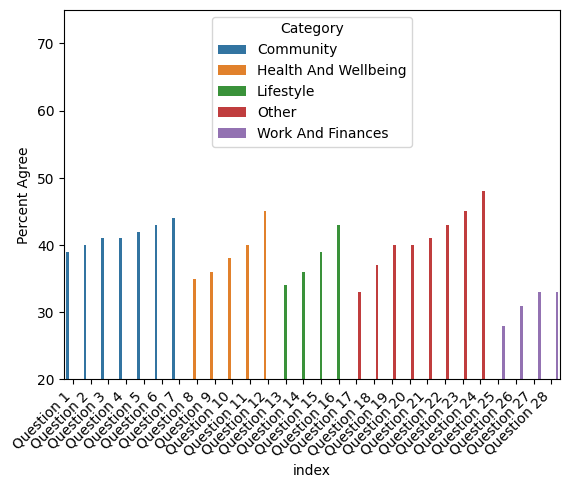

In [357]:
ax = sns.barplot(data = df_agree, x = 'index', y = 'Percent Agree', hue = 'Category')
ax.set(ylim = [20,75])
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')

In [677]:
fig = px.bar(df_agree, x = 'index', y = 'Percent Agree', color = 'Category', title = "Community Involvement Results")
fig.update_layout({"yaxis": {
    "tickformat": ',.0%',
    "range": [.20,.60]
  },
                  "xaxis": {"title" : ""}})
fig.show()
fig.write_html("plots_2022/HTML/Community_Questionaire_Percent_Agree.html",  include_plotlyjs="cdn", full_html=False)

In [679]:
df_agree['IsHighestHSSDiff'] = ((df_agree["Agree"] - df_agree["Do Not Agree"]).apply(abs)>
                        (
                            (df_agree["Agree"] - df_agree["Do Not Agree"]).apply(abs).mean()
                            + (df_agree["Agree"] - df_agree["Do Not Agree"]).apply(abs).std()
                        ))
df_agree_HSS = df_agree[df_agree['IsHighestHSSDiff']].drop(columns = ['Percent Agree', 
                                                                      'IsHighestHSSDiff']).melt(id_vars =
                                                                                                ['index', 'Statement' , 'Category'], 
                                              value_name = 'Hope Scale Score',
                                             var_name = 'Agree Status')
df_agree_HSS['Hope Scale Score'] = df_agree_HSS['Hope Scale Score'].apply(round)
fig = px.bar(df_agree_HSS.sort_values('index'), x = 'index',
             y = 'Hope Scale Score', color = 'Agree Status', barmode = 'group',
            title = "Most Hope Scale Dependent Questions")
fig.update_layout({"yaxis": {
    "range": [35,50],
    
  },
                  "xaxis": {"title" : ""}})
fig.show()
fig.write_html("plots_2022/HTML/Community_Questionaire_HSS.html",  include_plotlyjs="cdn", full_html=False)

In [682]:
StrongestDependenceQuestions = [x for x in df_agree[df_agree['IsHighestHSSDiff']]['Statement'].values]
for col in StrongestDependenceQuestions:
    tmp = df_orig_military[[col, "Hope Scale Score"]].copy()
    tmp['SortCol'] = tmp[col].apply(lambda x: (1 - ('Agree' in str(x) )*(1 + ('Strongly' in str(x)) )))
    uns = df_orig_military[col].unique()
    replace_with_na = []
    for un in uns:
        if not 'agree' in str(un).lower():
            tmp[col] = tmp[col].replace(un , np.nan)
    tmp = tmp.dropna().sort_values("SortCol")
    col2 = col.split(':')[0] + "?"
    question_id = questionDict[col2]
    fig = px.box(tmp, 
                 x = col, y = "Hope Scale Score", 
                 color = col,
                title = resize(question_id + ': ' + col2, 50).replace("\n", "<br>"))
    fig.update_layout(showlegend=False,
                xaxis_title="")
    question_id = question_id.replace(" ","_")
    fig.show()
    fig.write_html(f"plots_2022/HTML/Community_Questionaire_{question_id}.html",  include_plotlyjs="cdn", full_html=False)

In [734]:
df_orig_military['Decades of Service'] = (df_orig_military['What year did your status become retired/discharged? (Ex: 2006)']
                                        - 
df_orig_military['What year did you begin your time in the service? (Ex: 1985)'])//10
df_orig_military['Decade started'] = 10*(df_orig_military['What year did you begin your time in the service? (Ex: 1985)']//10).dropna().apply(round)
fig = px.box(df_orig_military, y = 'Hope Scale Score', 
             x = 'Decades of Service',
            color = 'Decades of Service',
            title = "Service Length Affect On Hope Scale Score")
fig.update_layout(showlegend=False)
fig.write_html(f"plots_2022/HTML/Service_Length.html",  include_plotlyjs="cdn", full_html=False)
fig.show()

In [724]:
[x for x in df_orig_military if 'era' in x.lower()]

['Have you ever received information or assistance fromÂ\xa0veteran serving organizations within your community?',
 'Post-9/11 era (September 11, 2001 - Present):Service era (Select all that apply)',
 'Persian Gulf era (August 1991 - September 2001):Service era (Select all that apply)',
 'Post-Vietnam era (May 1975 - July 1991):Service era (Select all that apply)',
 'Vietnam era (August 1964 - April 1975):Service era (Select all that apply)',
 'Between Korea and Vietnam era (February 1955 - July 1964):Service era (Select all that apply)',
 'Korean War era (June 1950 - January 1955):Service era (Select all that apply)',
 'Between WWII and Korean War era (August 1947- May 1950):Service era (Select all that apply)',
 'WWII era (September 1940 - July 1947):Service era (Select all that apply)',
 'Opportunities for me to connect with other military/veteran service members and families/caregivers:What information or resources are you seeking (Select all that apply)?',
 'Opportunities to parti

In [745]:
px.scatter(df_results[df_results["With Intervention"] != "Predicted"], 
           x = 'Hope Scale Score', y = "Predicted Hope Scale Score")

In [779]:
dictionary = {'next_count' : 1}
def encode_dict(x, dictionary):
    if not x in dictionary:
        dictionary[x] = dictionary['next_count']
        dictionary['next_count'] += 1
    return dictionary[x]
df_results["Statement Id"] = "Statement " + df_results["Impact Type"].apply(encode_dict, args = [dictionary]).astype(str)
fig = px.bar(df_results[df_results["With Intervention"] != "Predicted"].groupby(["Statement Id", "With Intervention"],
                                                                          as_index = False).agg(
    {"Predicted Hope Scale Score": "mean"}),
       x = "Statement Id", y = "Predicted Hope Scale Score",
      color = "With Intervention", 
             barmode = 'group',
             title = "Determining the effects of impact"
            )
fig.update_layout({"yaxis": {
    "range": [30,45],
    "title" : "Hope Scale Score"
    
  },
                  "xaxis": {"title" : ""},
                  "legend" : {"title" : ""}})
fig.write_html(f"plots_2022/HTML/Effects_of_impact.html",  include_plotlyjs="cdn", full_html=False)

In [801]:
df_results["Hope Scale State"] = df_results['Hope Scale Score'] < 40
df_results["Hope Scale Improvement"] = df_results['Predicted Hope Scale Score'] - df_results['Hope Scale Score']
fig = px.bar(df_results[df_results["With Intervention"] == "After Intervention"].groupby(["Statement Id",
                                                                                          "With Intervention"],
                                                                          as_index = False).agg(
    {"Hope Scale Improvement": "mean"}),
       x = "Statement Id", y = "Hope Scale Improvement",
             color = "Statement Id",
             barmode = 'group',
             title = "Net effects of impact"
            )
fig.update_layout({"yaxis": {
    "range": [0,3]
    
  },
                  "xaxis": {"title" : ""}})
fig.write_html(f"plots_2022/HTML/Effects_of_impact_difference.html",  include_plotlyjs="cdn", full_html=False)

In [792]:
html = formatHTMLtable(df_results[["Statement Id" ,"Impact Type"]].drop_duplicates().reset_index(drop = True).to_dict())
with open("plots_2022/HTML/Statements_Table.html", "w") as f:
    f.write(html)